# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [70]:
#import library
import pandas as pd 
import matplotlib.pyplot as plt  
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.metrics import silhouette_score  
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [ ]:
# load data
df = pd.read_csv('netflix_inisiasiasi.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **4. Exploratory Data Analysis (EDA)**


## Assesing Data

In [72]:
# cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [73]:
# cek missing value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [74]:
#  cek duplikasi data
print('Duplilasi data ada: ', df.duplicated().sum())

Duplilasi data ada:  0


## Cleaning Data

In [75]:
#  cek info data df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [76]:
# cek mising value
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [77]:
# Hapus kolom tidak penting yang memiliki missing values
df_clean = df.drop(columns=['director', 'cast', 'show_id','description'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   country       7976 non-null   object
 3   date_added    8797 non-null   object
 4   release_year  8807 non-null   int64 
 5   rating        8803 non-null   object
 6   duration      8804 non-null   object
 7   listed_in     8807 non-null   object
dtypes: int64(1), object(7)
memory usage: 550.6+ KB


In [78]:
# cek mising value
df_clean.isna().sum()

type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
dtype: int64

In [79]:
# Menangani missing value dengan kategori 'Unknown' karena nama negara tidak mungkin menggukan modus, median atau mode nanti rancu
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean.isnull().sum()
df_clean.isna().sum()

type             0
title            0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64

In [80]:
# menangani mising value pada date_added dan ratting
df_clean.dropna(subset=['date_added','rating', 'duration'],inplace=True)
clean_data = df_clean.copy()
clean_data.isnull().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [81]:
# load data bersih
clean_data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


## Encoding Decoding Data Kategorikal ke Numerik

In [82]:
# cek info data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8790 non-null   object
 1   title         8790 non-null   object
 2   country       8790 non-null   object
 3   date_added    8790 non-null   object
 4   release_year  8790 non-null   int64 
 5   rating        8790 non-null   object
 6   duration      8790 non-null   object
 7   listed_in     8790 non-null   object
dtypes: int64(1), object(7)
memory usage: 618.0+ KB


In [83]:
# cek missing value
clean_data.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [84]:
# load data bersih
clean_data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [85]:
# Menggunakan Binary Encoding Untuk TV dan Movie
clean_data['type'] = clean_data['type'].map({'Movie': 0, 'TV Show': 1})
type_encoding = clean_data.copy()

type_encoding.head()

,type,title,country,date_added,release_year,rating,duration,listed_in
0,0,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,1,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,1,Ganglands,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,1,Jailbirds New Orleans,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,1,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [86]:
import category_encoders as ce

# Inisialisasi BinaryEncoder
encoder = ce.BinaryEncoder(cols=['country'])

# Terapkan encoder hanya ke kolom 'country'
encoding = encoder.fit_transform(type_encoding[['country']])

# Drop kolom asli 'country'
type_encoding_no_country = type_encoding.drop(columns=['country'])

# Gabungkan hasil encoding ke dataframe asli
country_encoding = pd.concat([type_encoding_no_country, encoding], axis=1)

# Cek hasilnya
print(country_encoding.head())

   type                  title          date_added  release_year rating  \
0     0   Dick Johnson Is Dead  September 25, 2021          2020  PG-13   
1     1          Blood & Water  September 24, 2021          2021  TV-MA   
2     1              Ganglands  September 24, 2021          2021  TV-MA   
3     1  Jailbirds New Orleans  September 24, 2021          2021  TV-MA   
4     1           Kota Factory  September 24, 2021          2021  TV-MA   

    duration                                          listed_in  country_0  \
0     90 min                                      Documentaries          0   
1  2 Seasons    International TV Shows, TV Dramas, TV Mysteries          0   
2   1 Season  Crime TV Shows, International TV Shows, TV Act...          0   
3   1 Season                             Docuseries, Reality TV          0   
4  2 Seasons  International TV Shows, Romantic TV Shows, TV ...          0   

   country_1  country_2  country_3  country_4  country_5  country_6  \
0        

In [87]:
# cek rating dan lihat kategori yang ada
print(country_encoding['rating'].unique())

['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [88]:
# Ordinal Encoding untuk 'rating'
rating_map = {
    'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3, 'TV-MA': 4, 'Not Rated': 5,
    'TV-14': 6, 'TV-PG': 7, 'TV-Y': 8, 'TV-Y7': 9, 'TV-G': 10,
    'NC-17': 11, 'NR': 5, 'UR': 5, 'TV-Y7-FV': 9
}

country_encoding = country_encoding[~country_encoding['rating'].str.contains(r'\d+ min', na=False)]

country_encoding['rating'] = country_encoding['rating'].map(rating_map)
rating_encoding = country_encoding.copy()
rating_encoding.head()

,type,title,date_added,release_year,rating,duration,listed_in,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9
0,0,Dick Johnson Is Dead,"September 25, 2021",2020,2,90 min,Documentaries,0,0,0,0,0,0,0,0,0,1
1,1,Blood & Water,"September 24, 2021",2021,4,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",0,0,0,0,0,0,0,0,1,0
2,1,Ganglands,"September 24, 2021",2021,4,1 Season,"Crime TV Shows, International TV Shows, TV Act...",0,0,0,0,0,0,0,0,1,1
3,1,Jailbirds New Orleans,"September 24, 2021",2021,4,1 Season,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,1,1
4,1,Kota Factory,"September 24, 2021",2021,4,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",0,0,0,0,0,0,0,1,0,0


In [89]:
# Ekstrak angka dari duration
rating_encoding['duration_numeric'] = rating_encoding['duration'].str.extract('(\d+)').astype(float)

# Hapus kolom asli duration, bukan duration_numeric
rating_encoding = rating_encoding.drop(columns=['duration'])

# Salin dataset setelah menghapus duration
durasi_encoding = rating_encoding.copy()

durasi_encoding.head()

,type,title,date_added,release_year,rating,listed_in,country_0,country_1,country_2,country_3,country_4,country_5,country_6,country_7,country_8,country_9,duration_numeric
0,0,Dick Johnson Is Dead,"September 25, 2021",2020,2,Documentaries,0,0,0,0,0,0,0,0,0,1,90.0
1,1,Blood & Water,"September 24, 2021",2021,4,"International TV Shows, TV Dramas, TV Mysteries",0,0,0,0,0,0,0,0,1,0,2.0
2,1,Ganglands,"September 24, 2021",2021,4,"Crime TV Shows, International TV Shows, TV Act...",0,0,0,0,0,0,0,0,1,1,1.0
3,1,Jailbirds New Orleans,"September 24, 2021",2021,4,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,1,1,1.0
4,1,Kota Factory,"September 24, 2021",2021,4,"International TV Shows, Romantic TV Shows, TV ...",0,0,0,0,0,0,0,1,0,0,2.0


In [90]:
durasi_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              8790 non-null   int64  
 1   title             8790 non-null   object 
 2   date_added        8790 non-null   object 
 3   release_year      8790 non-null   int64  
 4   rating            8790 non-null   int64  
 5   listed_in         8790 non-null   object 
 6   country_0         8790 non-null   int64  
 7   country_1         8790 non-null   int64  
 8   country_2         8790 non-null   int64  
 9   country_3         8790 non-null   int64  
 10  country_4         8790 non-null   int64  
 11  country_5         8790 non-null   int64  
 12  country_6         8790 non-null   int64  
 13  country_7         8790 non-null   int64  
 14  country_8         8790 non-null   int64  
 15  country_9         8790 non-null   int64  
 16  duration_numeric  8790 non-null   float64
dtype

In [91]:
import category_encoders as ce

# Inisialisasi BinaryEncoder
encoder = ce.BinaryEncoder(cols=['listed_in'])

# Terapkan encoder ke kolom 'listed_in'
encoded_genre = encoder.fit_transform(durasi_encoding[['listed_in']])

# Gabungkan hasil encoding dengan kolom lain
genre_encoding = pd.concat([durasi_encoding.drop(columns=['listed_in']), encoded_genre], axis=1)

# Cek hasilnya
print(genre_encoding.head())

   type                  title          date_added  release_year  rating  \
0     0   Dick Johnson Is Dead  September 25, 2021          2020       2   
1     1          Blood & Water  September 24, 2021          2021       4   
2     1              Ganglands  September 24, 2021          2021       4   
3     1  Jailbirds New Orleans  September 24, 2021          2021       4   
4     1           Kota Factory  September 24, 2021          2021       4   

   country_0  country_1  country_2  country_3  country_4  ...  listed_in_0  \
0          0          0          0          0          0  ...            0   
1          0          0          0          0          0  ...            0   
2          0          0          0          0          0  ...            0   
3          0          0          0          0          0  ...            0   
4          0          0          0          0          0  ...            0   

   listed_in_1  listed_in_2  listed_in_3  listed_in_4  listed_in_5  \
0   

In [92]:
# Konversi ke datetime
genre_encoding['date_added'] = genre_encoding['date_added'].str.strip()
genre_encoding['date_added'] = pd.to_datetime(genre_encoding['date_added'], format='%B %d, %Y')
genre_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   type              8790 non-null   int64         
 1   title             8790 non-null   object        
 2   date_added        8790 non-null   datetime64[ns]
 3   release_year      8790 non-null   int64         
 4   rating            8790 non-null   int64         
 5   country_0         8790 non-null   int64         
 6   country_1         8790 non-null   int64         
 7   country_2         8790 non-null   int64         
 8   country_3         8790 non-null   int64         
 9   country_4         8790 non-null   int64         
 10  country_5         8790 non-null   int64         
 11  country_6         8790 non-null   int64         
 12  country_7         8790 non-null   int64         
 13  country_8         8790 non-null   int64         
 14  country_9         8790 non-nu

In [93]:
# simpan data hasil encoding
data_encoded = genre_encoding.copy()
data_encoded.head()

,type,title,date_added,release_year,rating,country_0,country_1,country_2,country_3,country_4,...,listed_in_0,listed_in_1,listed_in_2,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9
0,0,Dick Johnson Is Dead,2021-09-25,2020,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,Blood & Water,2021-09-24,2021,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,Ganglands,2021-09-24,2021,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,1,Jailbirds New Orleans,2021-09-24,2021,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,Kota Factory,2021-09-24,2021,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Visualisasi Data

In [94]:
# cek statistik data numerik
data_encoded.describe()

,type,date_added,release_year,rating,country_0,country_1,country_2,country_3,country_4,country_5,...,listed_in_0,listed_in_1,listed_in_2,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9
count,8790.000000,8790,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,...,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000,8790.000000
mean,0.303072,2019-05-17 21:44:01.638225408,2014.183163,4.959613,0.029010,0.042207,0.063140,0.134926,0.161320,0.229920,...,0.000455,0.086803,0.156883,0.341183,0.419909,0.476906,0.515700,0.468146,0.440842,0.450284
min,0.000000,2008-01-01 00:00:00,1925.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2018-04-06 00:00:00,2013.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2019-07-03 00:00:00,2017.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2020-08-19 18:00:00,2019.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2021-09-25 00:00:00,2021.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,0.459612,NaN,8.825466,2.018254,0.167845,0.201073,0.243228,0.341664,0.367846,0.420805,...,0.021329,0.281562,0.363711,0.474134,0.493572,0.499495,0.499782,0.499013,0.496516,0.497551


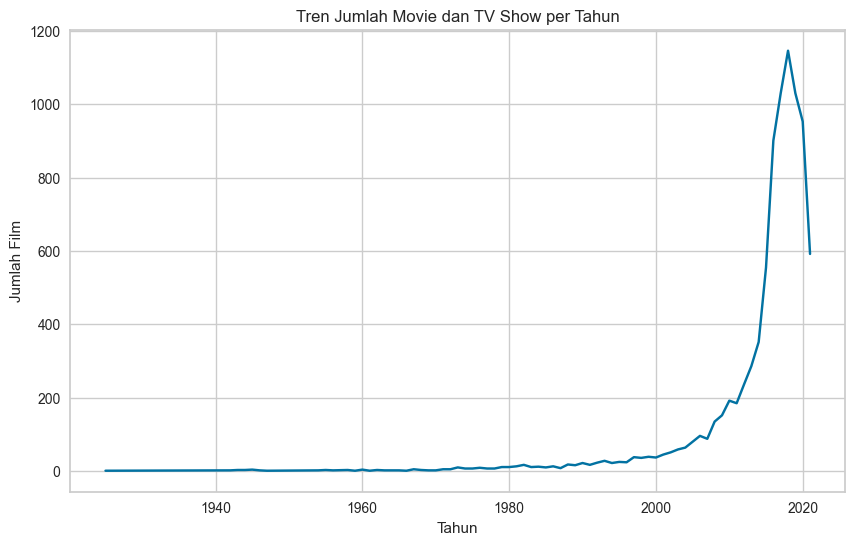

In [95]:
# Jumlah film per tahun
film_per_year = data_encoded['release_year'].value_counts().sort_index()
film_per_year.plot(kind='line', figsize=(10, 6))
plt.title('Tren Jumlah Movie dan TV Show per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Film')
plt.show()

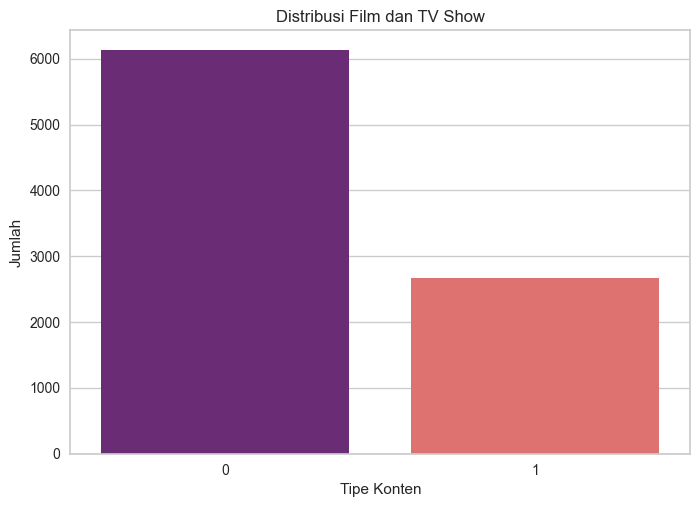

In [103]:
# Distribusi Film dan TV Show
sns.countplot(x='type', data=data_encoded, palette='magma', hue='type', legend=False)
plt.title('Distribusi Film dan TV Show')
plt.xlabel('Tipe Konten')
plt.ylabel('Jumlah')
plt.show()

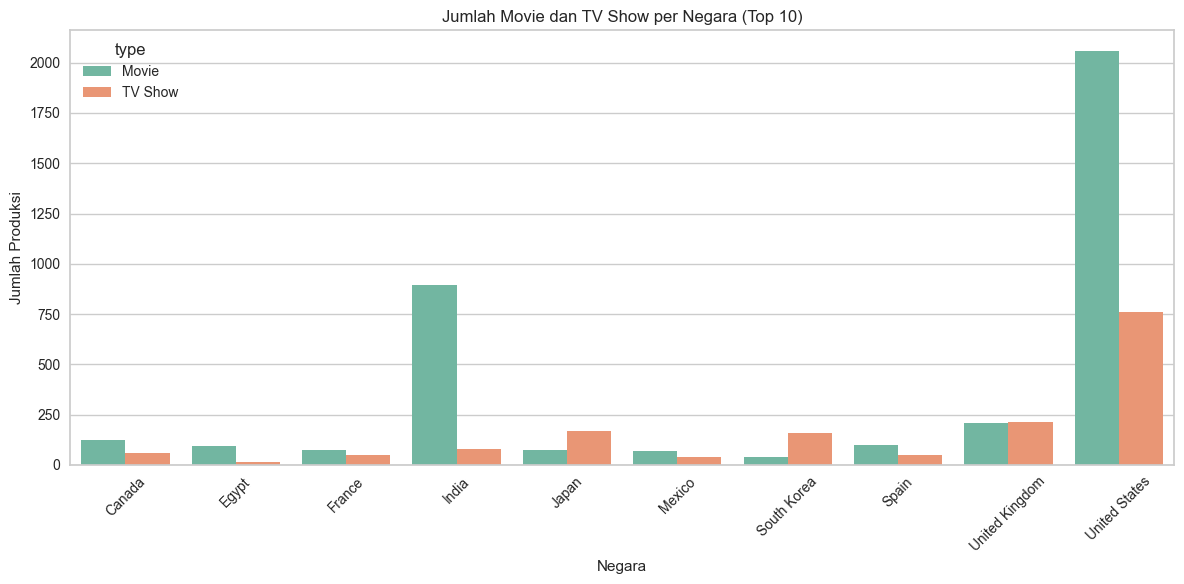

In [108]:
# Top 10 Negara dengan Produksi Film dan Tv Show Terbanyak
# Hitung jumlah Movie dan TV Show per negara
country_type_counts = df.groupby(['country', 'type']).size().reset_index(name='count')

# Ambil 10 negara teratas berdasarkan total produksi
top_countries = (
    country_type_counts.groupby('country')['count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter hanya top 10 negara
top_data = country_type_counts[country_type_counts['country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', hue='type', data=top_data, palette='Set2')

plt.title('Jumlah Movie dan TV Show per Negara (Top 10)')
plt.xticks(rotation=45)
plt.xlabel('Negara')
plt.ylabel('Jumlah Produksi')
plt.tight_layout()
plt.show()

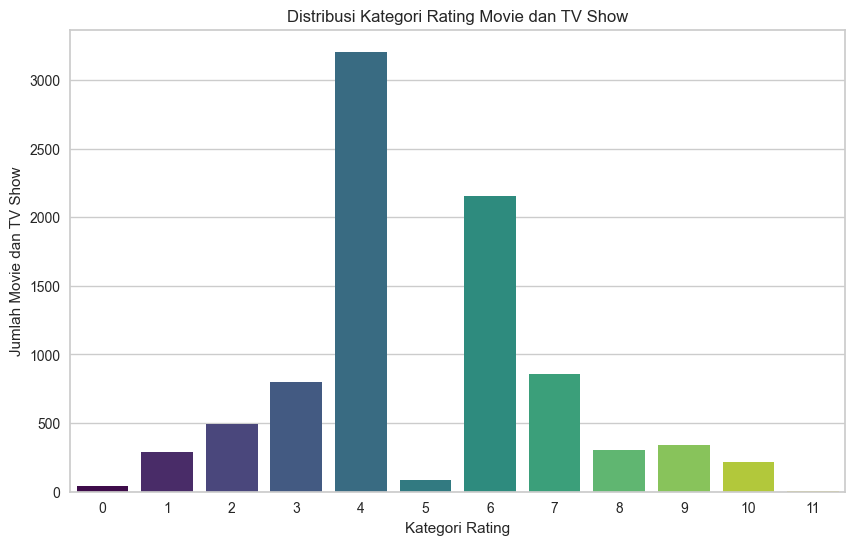

In [ ]:
# Distribusi Kategori Rating Movie dan TV Show'
rating_counts = data_encoded['rating'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, hue=rating_counts.index, palette='viridis', legend=False)
plt.title('Distribusi Kategori Rating Movie dan TV Show')
plt.xlabel('Kategori Rating')
plt.ylabel('Jumlah Movie dan TV Show')
plt.show()

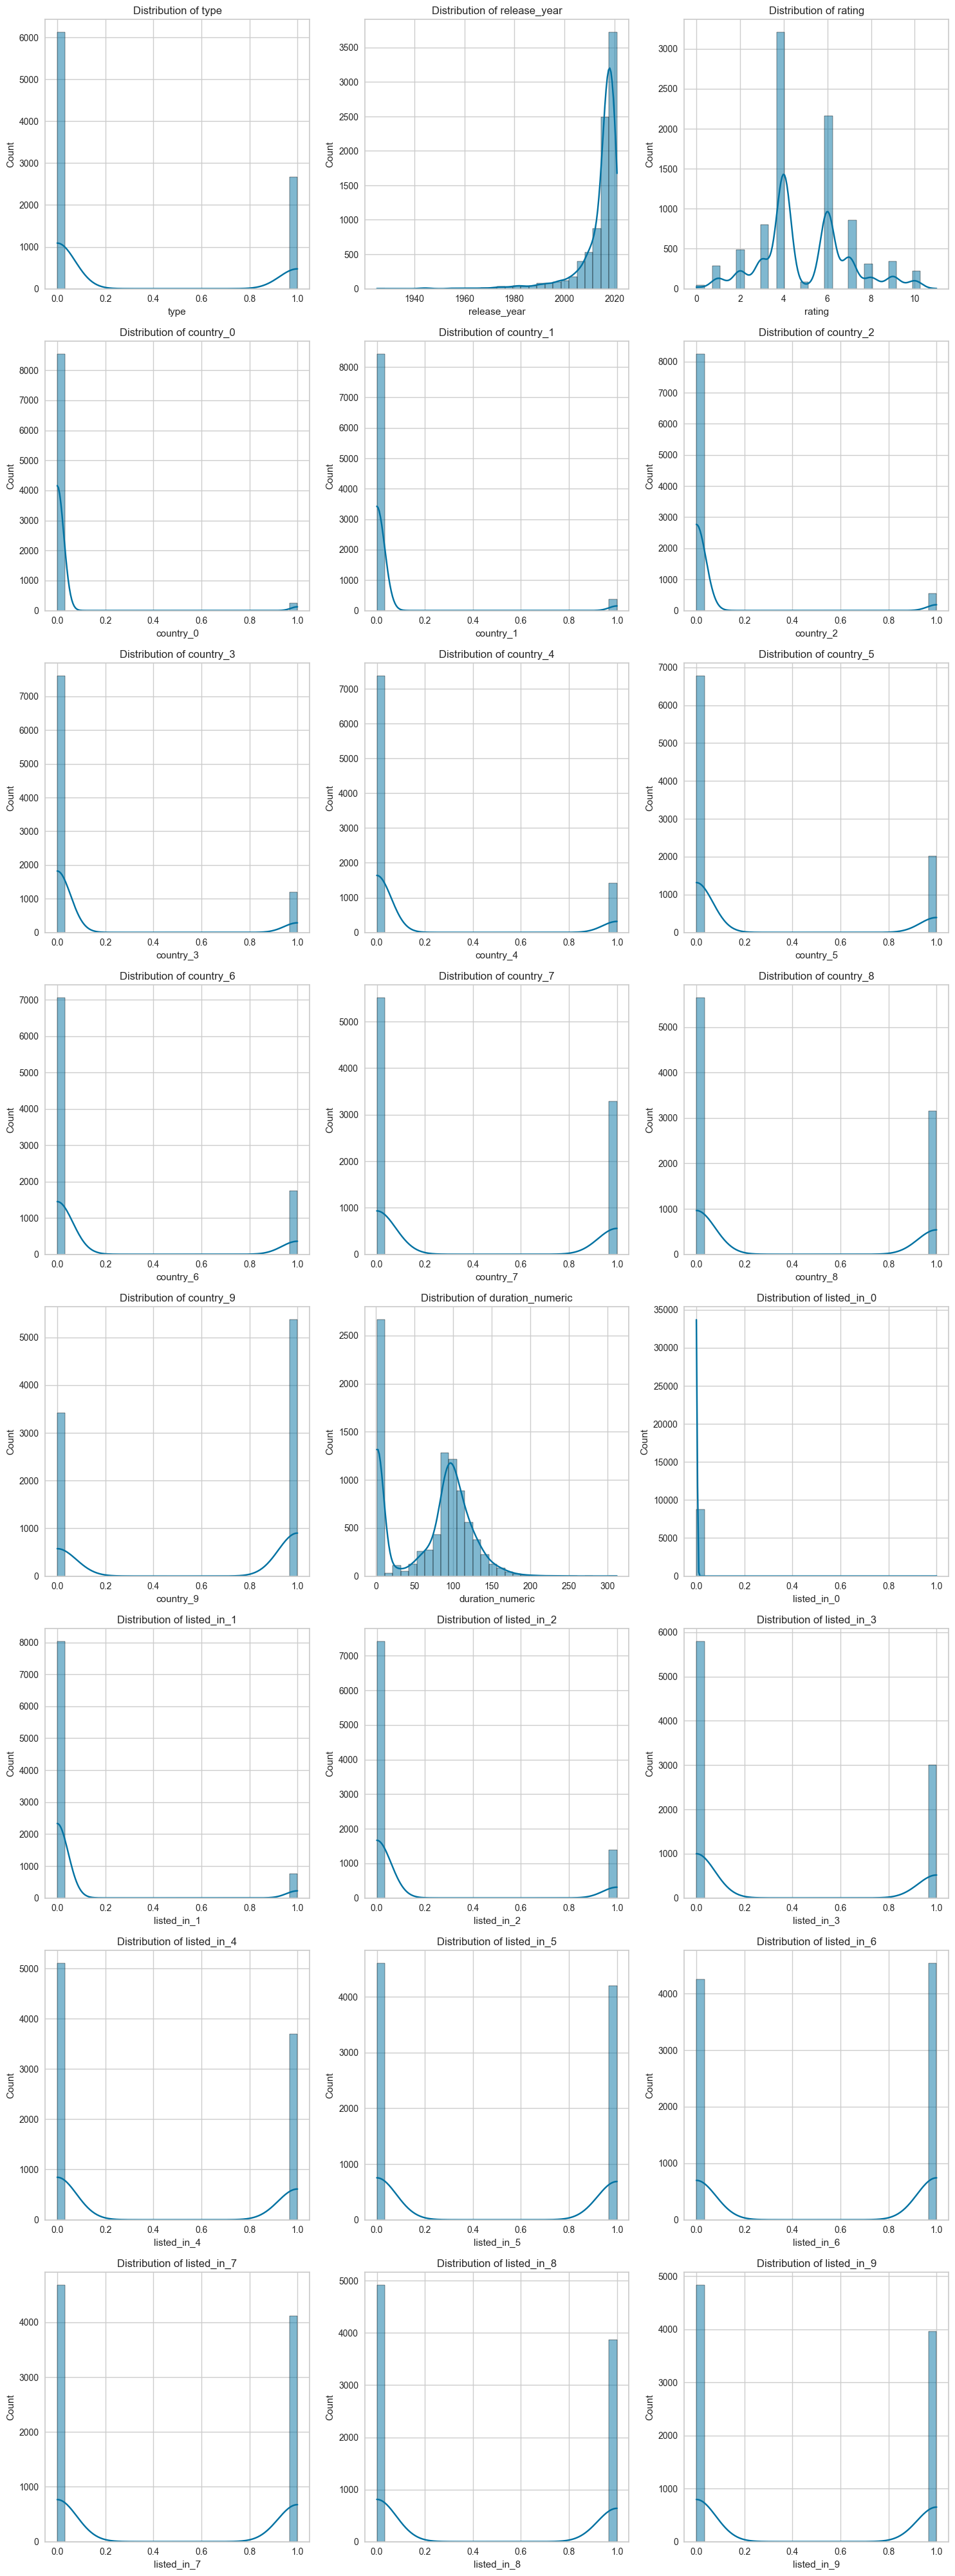

In [1365]:
# visualisasikan distribusi data fitur yang diplih

# pilih kolom numerik
df_numeric = data_encoded.select_dtypes(include=[np.number])

# Hitung jumlah baris yang diperlukan untuk subplot
num_cols = len(df_numeric)
num_rows = (num_cols + 2) // 3

plt.figure(figsize=(15, 5 * num_rows))  # Sesuaikan tinggi figure

for i, column in enumerate(df_numeric, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df_numeric[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

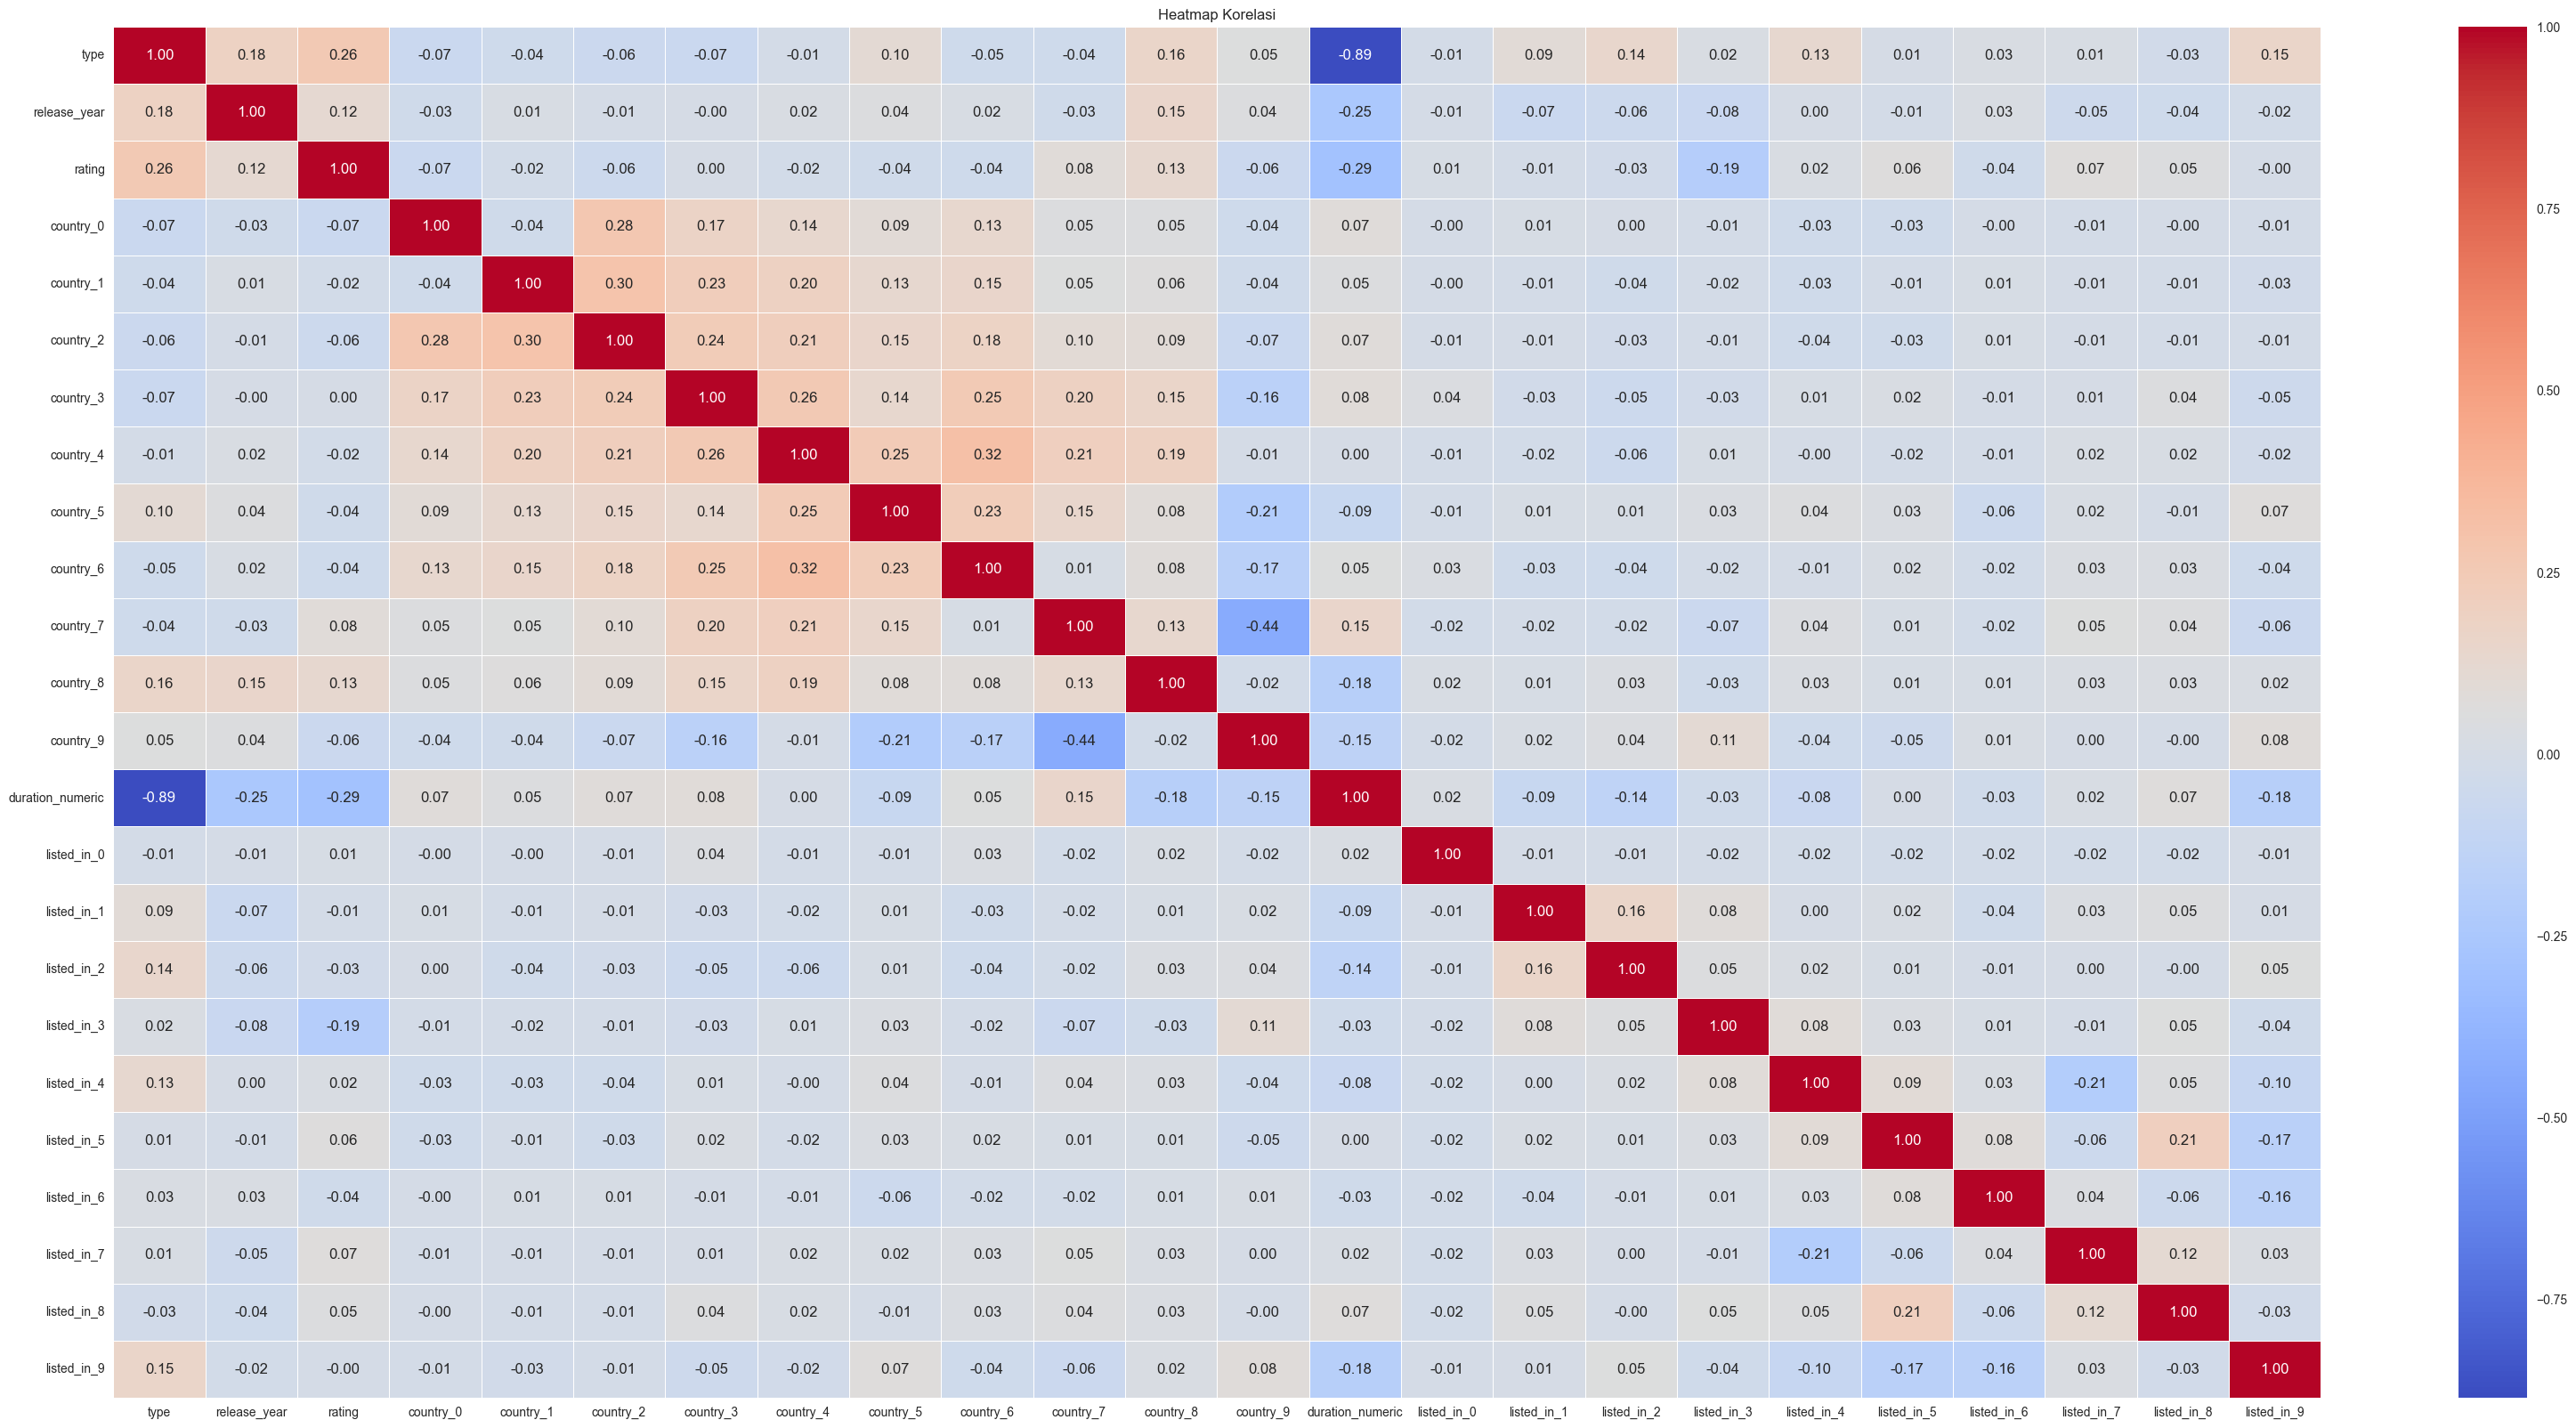

In [1366]:
# plot matrik korelasi
num_features = data_encoded.select_dtypes(include=[np.number])
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(40, 20))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

### Cek Outlier

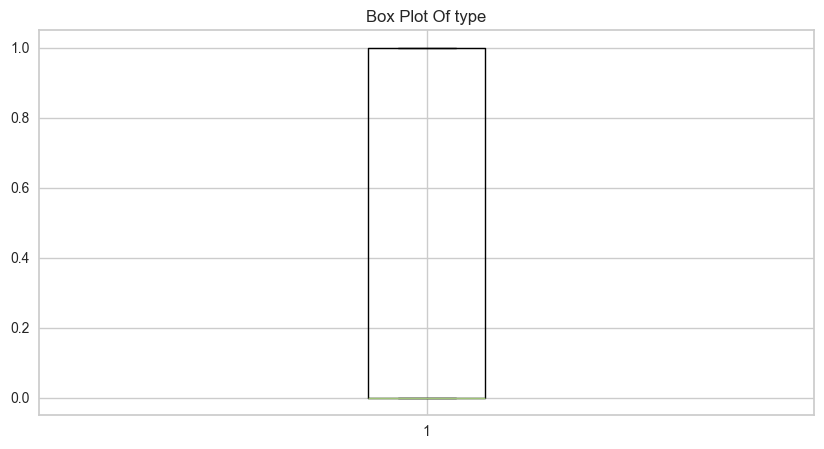

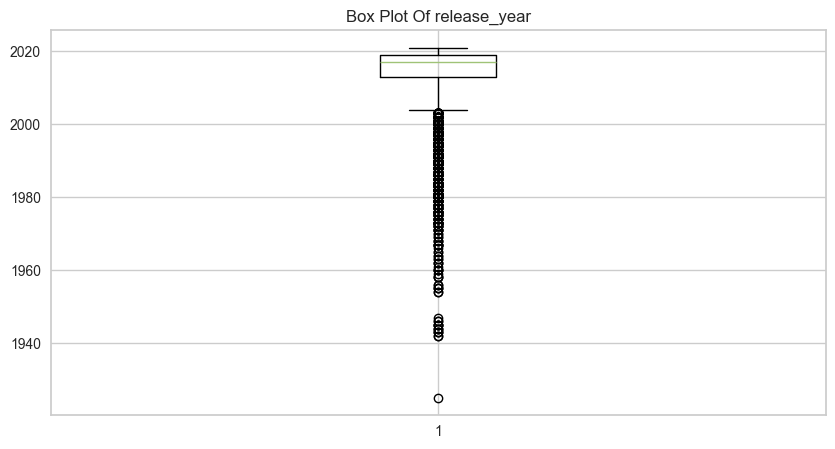

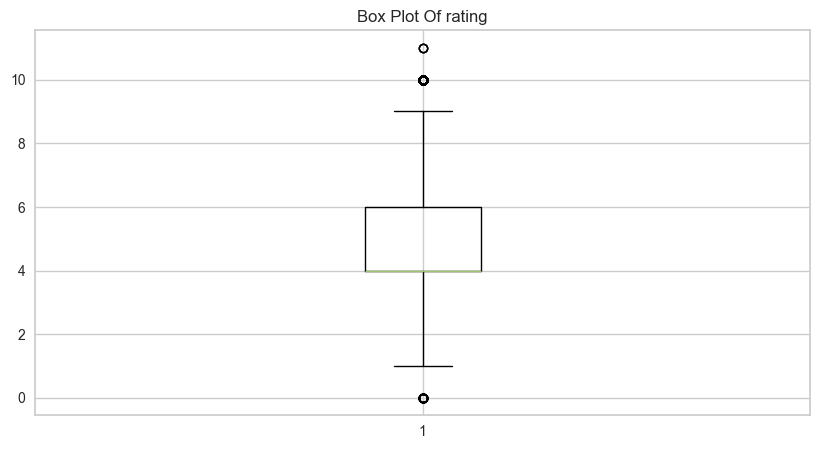

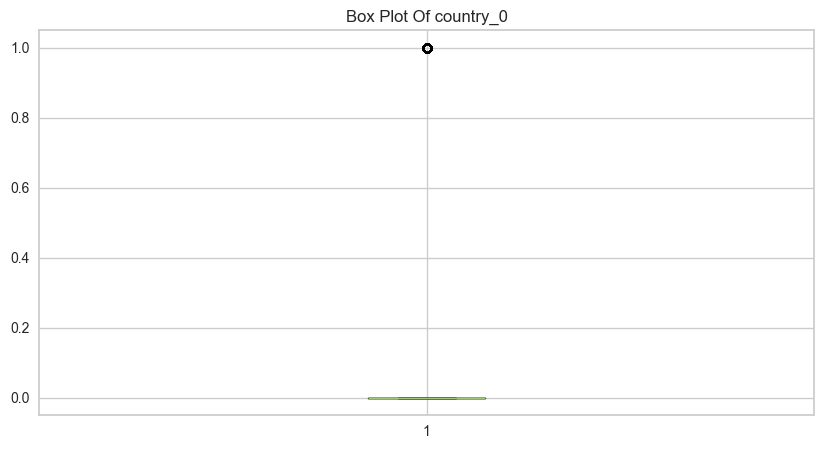

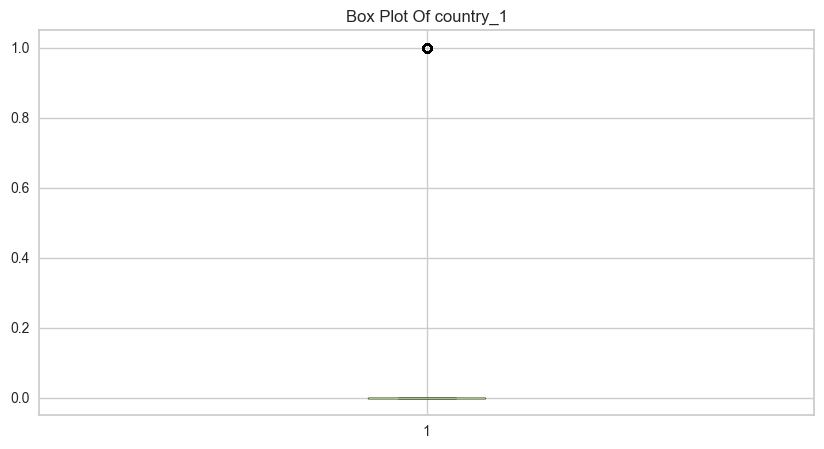

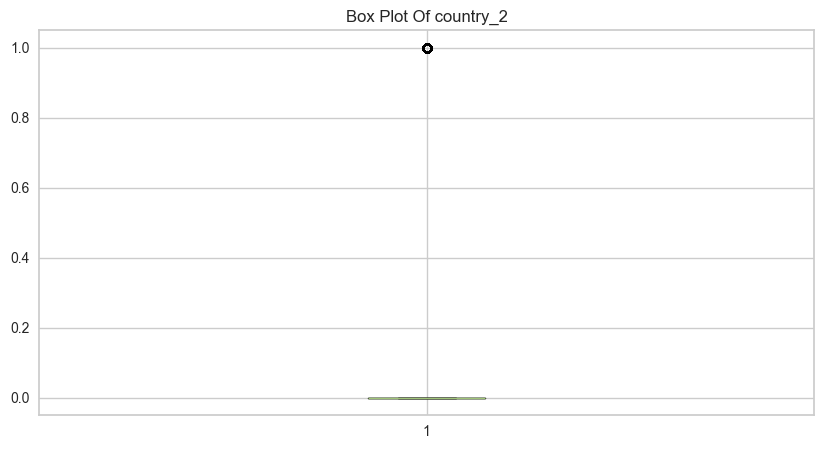

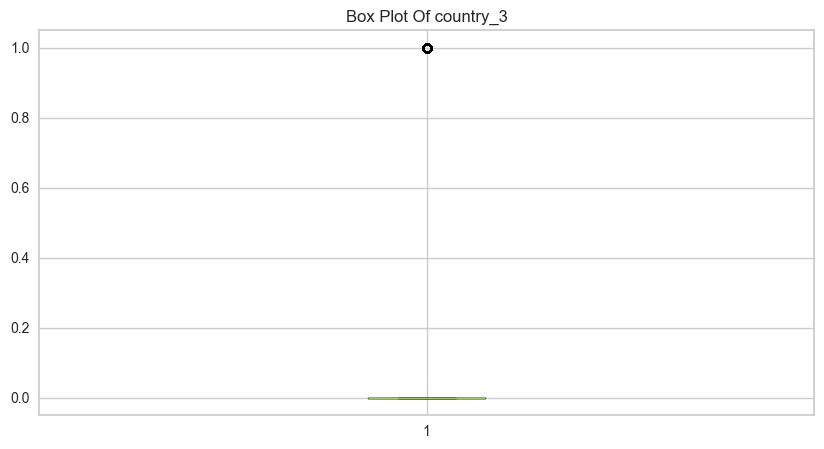

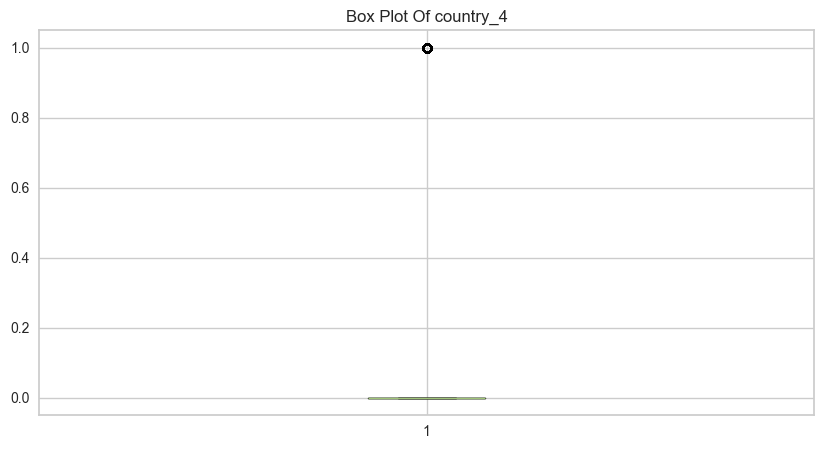

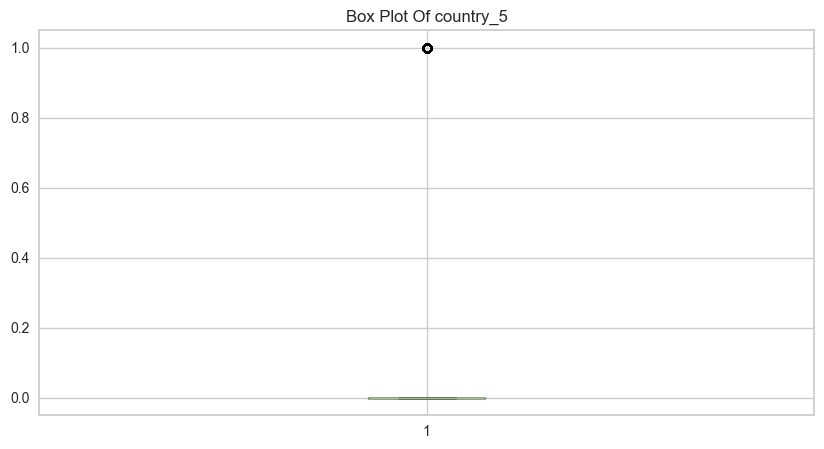

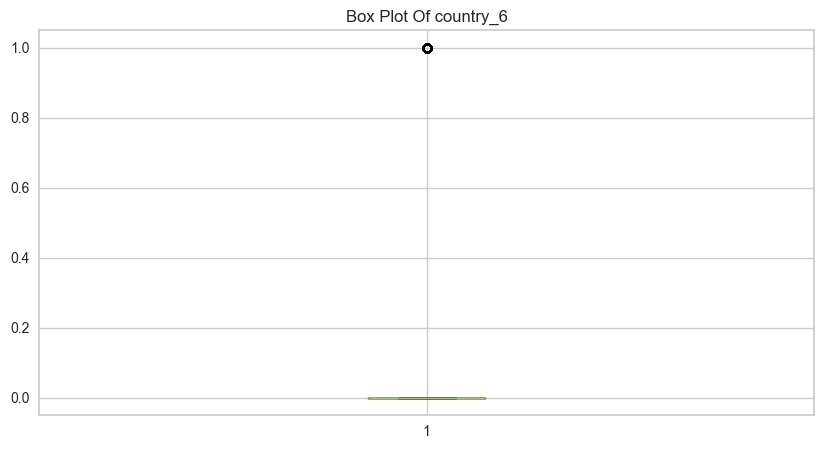

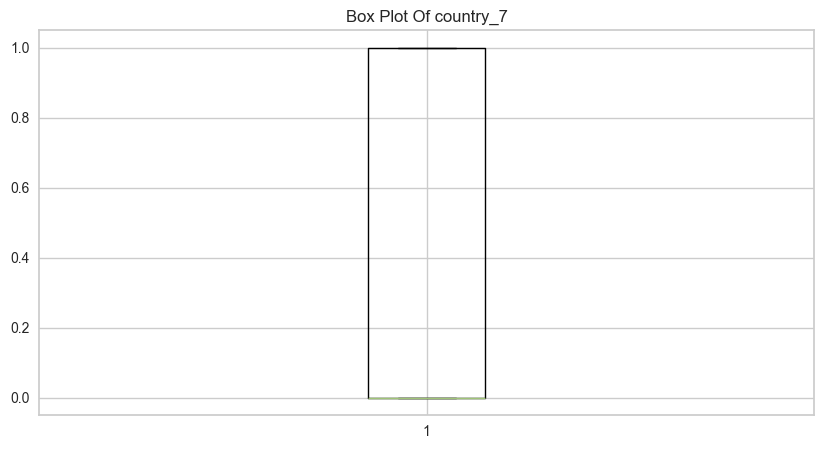

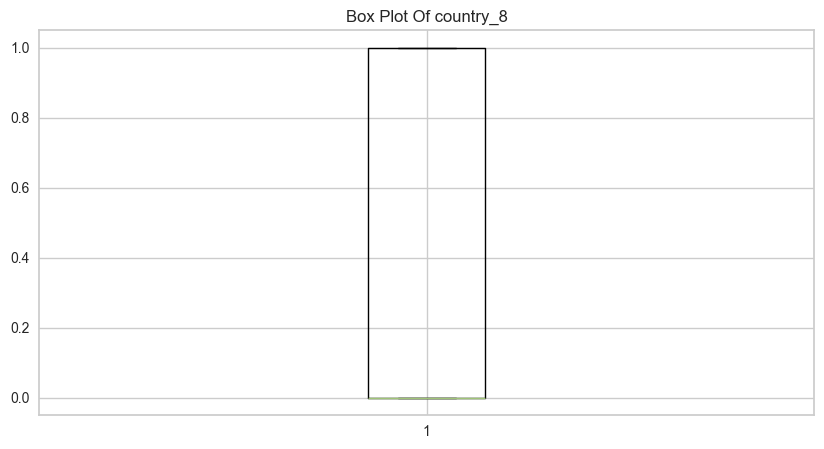

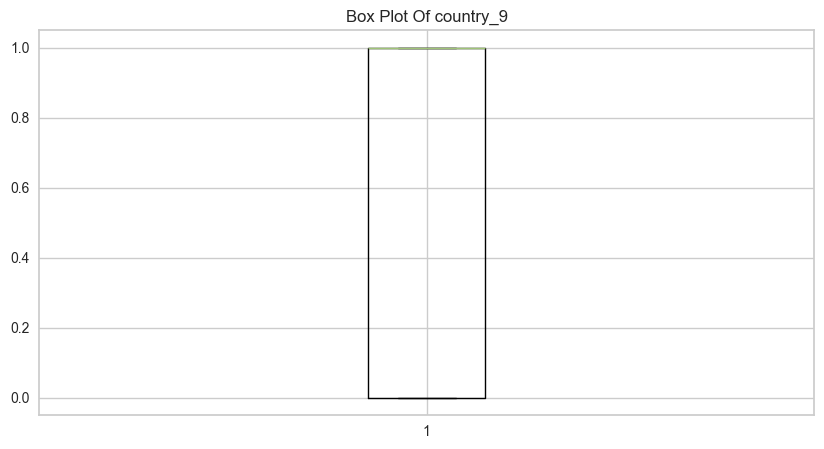

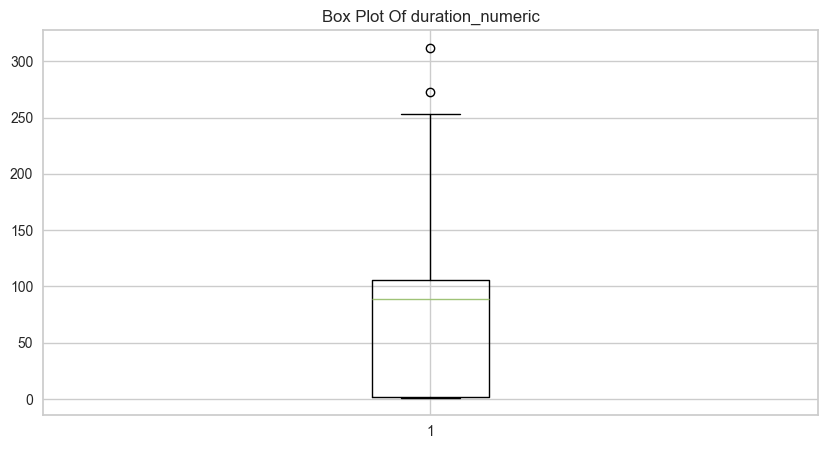

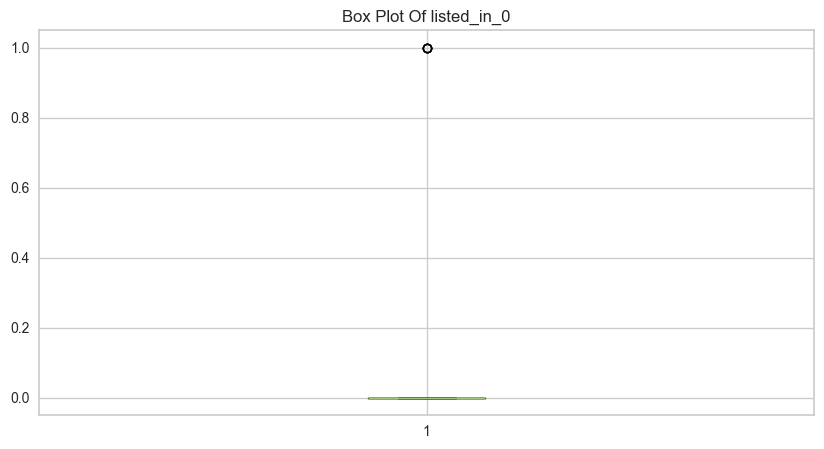

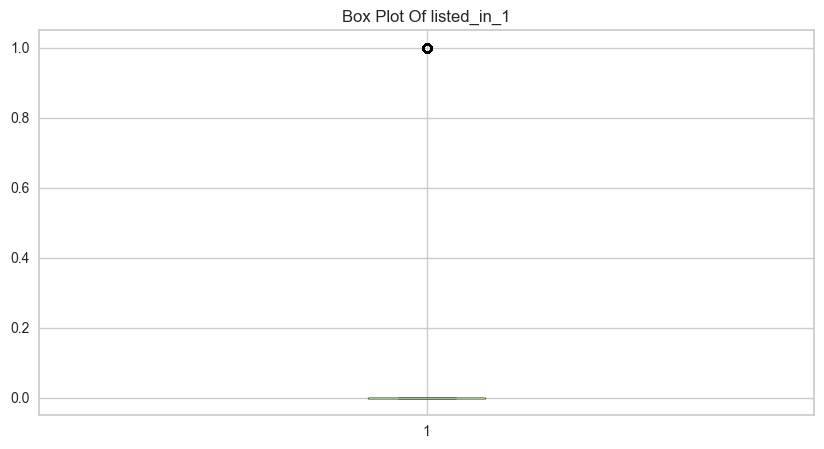

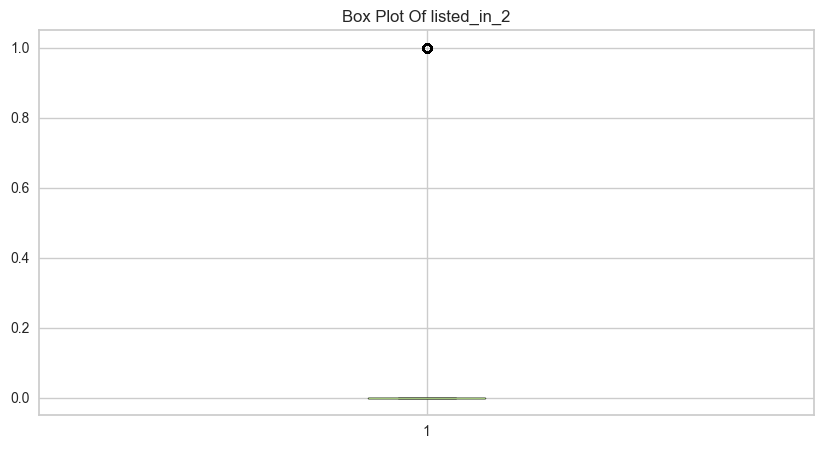

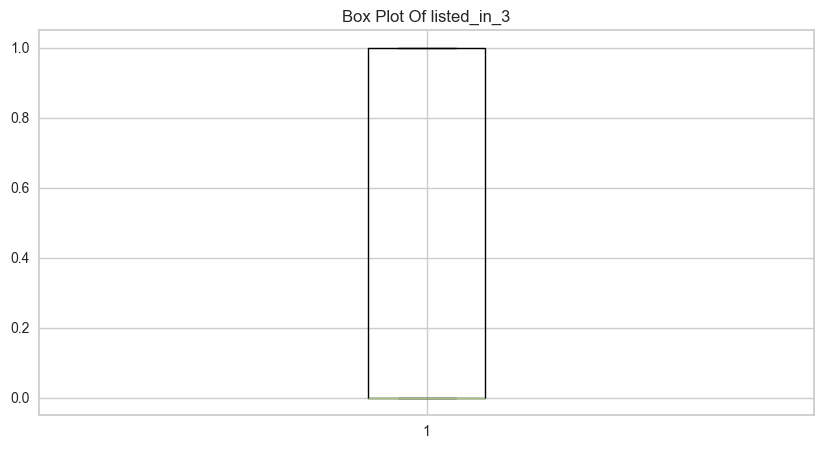

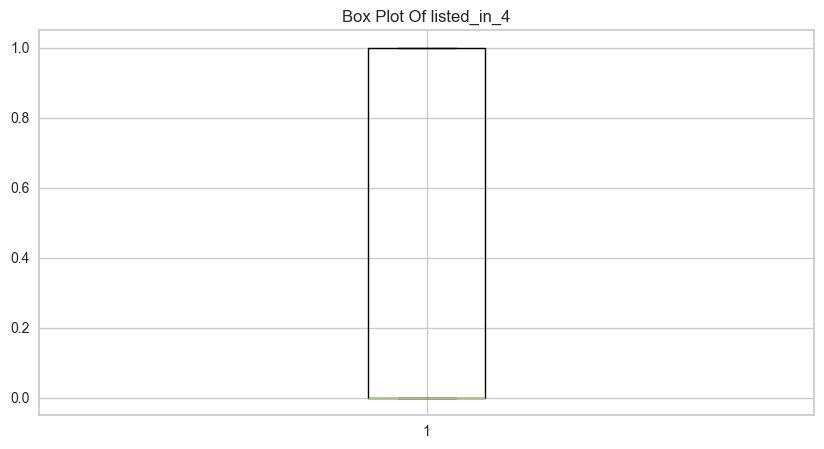

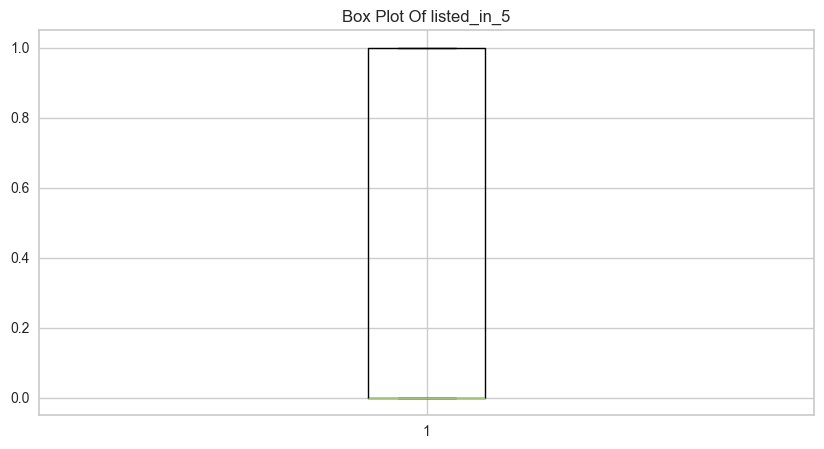

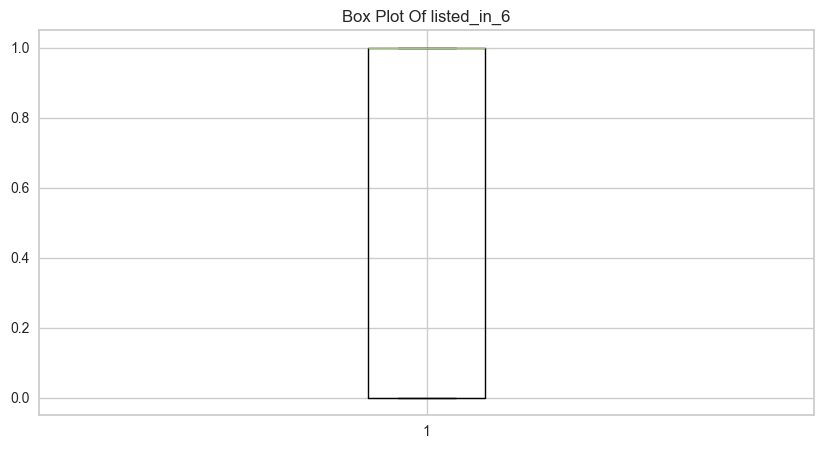

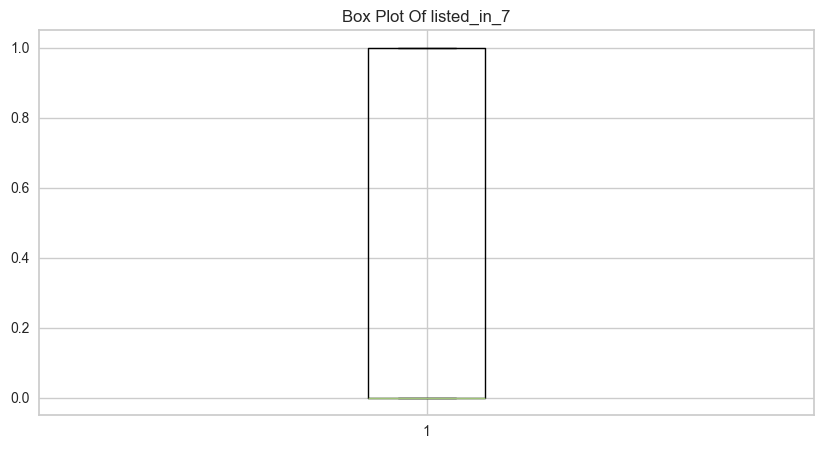

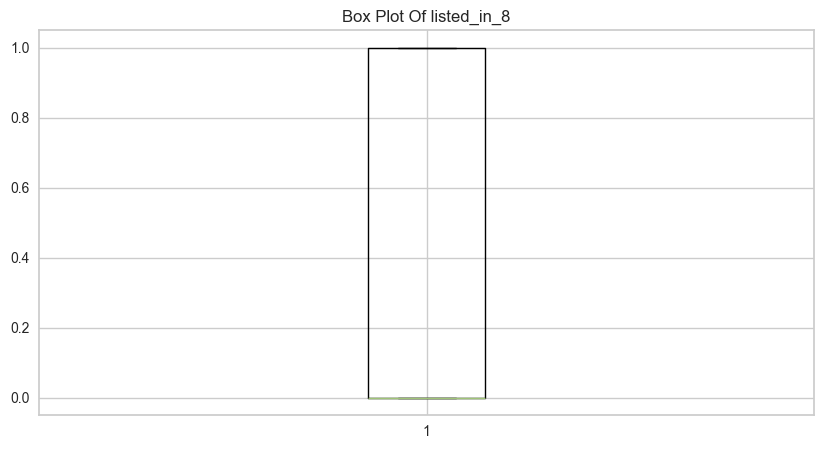

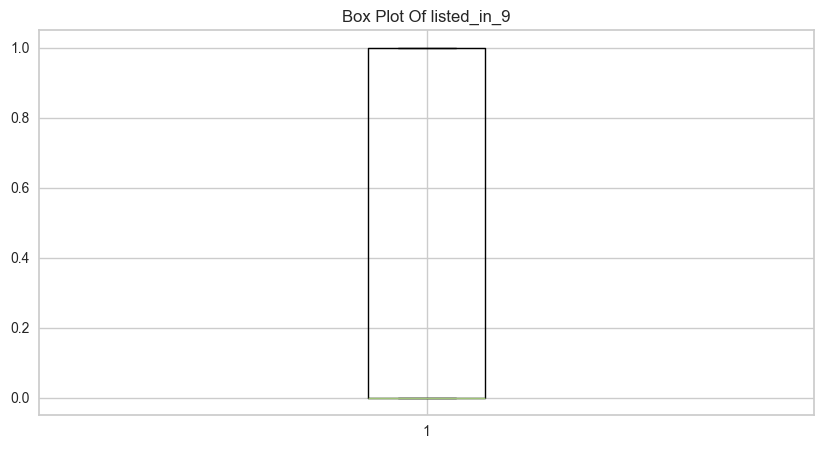

In [28]:
# Pilih hanya kolom dengan tipe data numerik
numeric_columns = data_encoded.select_dtypes(include=['number']).columns

# Plot boxplot hanya untuk kolom numerik
for feature in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(x=data_encoded[feature])
    plt.title(f"Box Plot Of {feature}")
    plt.show()

### Penanganan Outlier

In [ ]:
# Pilih hanya data numerik
numeric_data = data_encoded.select_dtypes(include=['number'])

# Hitung IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Gantilah outlier dengan median masing-masing kolom
median_values = numeric_data.median()

data_filter = numeric_data.copy()
for col in numeric_data.columns:
    data_filter[col] = numeric_data[col].mask(
        (numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col]),
        median_values[col]
    )

# Gabungkan kembali dengan kolom non-numerik**
data_non_numeric = data_encoded.select_dtypes(exclude=['number'])  # Ambil kolom non-numerik
data_filter = pd.concat([data_filter, data_non_numeric], axis=1)  # Gabungkan

# **Cek hasilnya**
print(data_filter.head())

   type  release_year  rating  country_0  country_1  country_2  country_3  \
0     0          2020       2          0          0          0          0   
1     1          2021       4          0          0          0          0   
2     1          2021       4          0          0          0          0   
3     1          2021       4          0          0          0          0   
4     1          2021       4          0          0          0          0   

   country_4  country_5  country_6  ...  listed_in_2  listed_in_3  \
0          0          0          0  ...            0            0   
1          0          0          0  ...            0            0   
2          0          0          0  ...            0            0   
3          0          0          0  ...            0            0   
4          0          0          0  ...            0            0   

   listed_in_4  listed_in_5  listed_in_6  listed_in_7  listed_in_8  \
0            0            0            0            

### Cek Outlier After Pembersihan

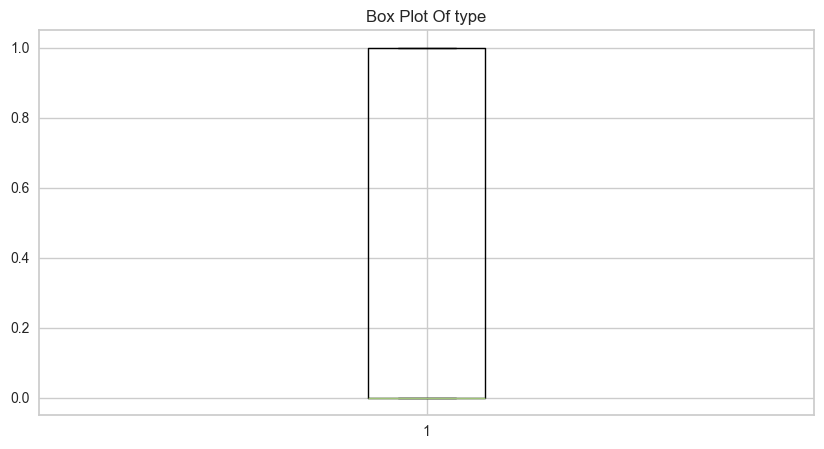

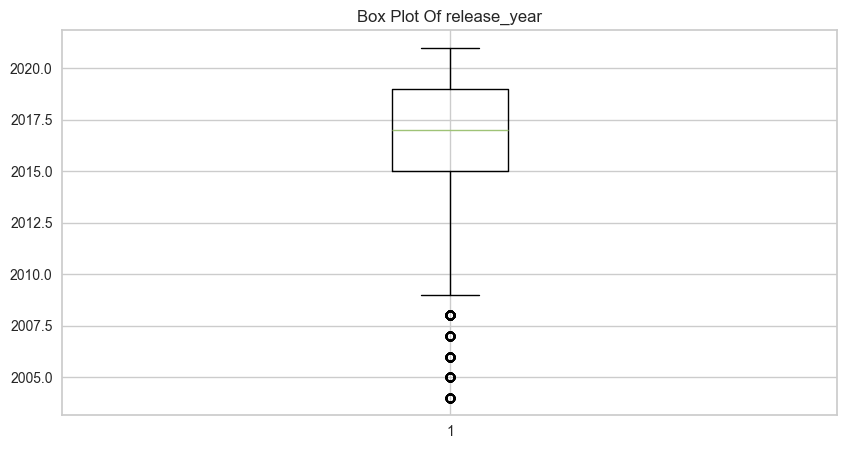

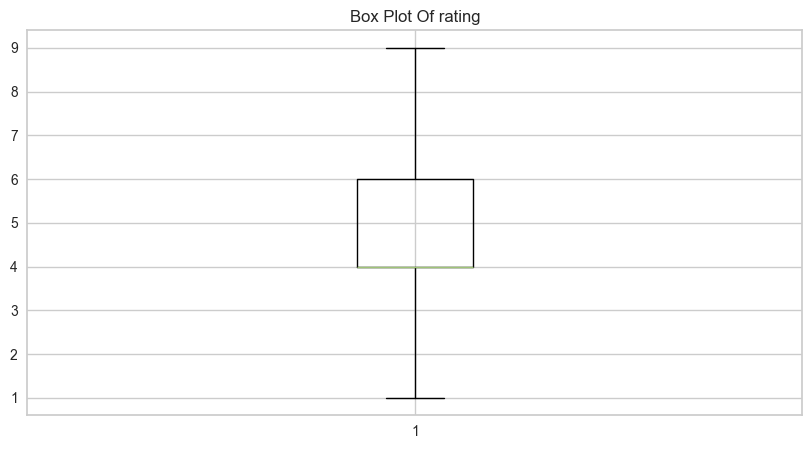

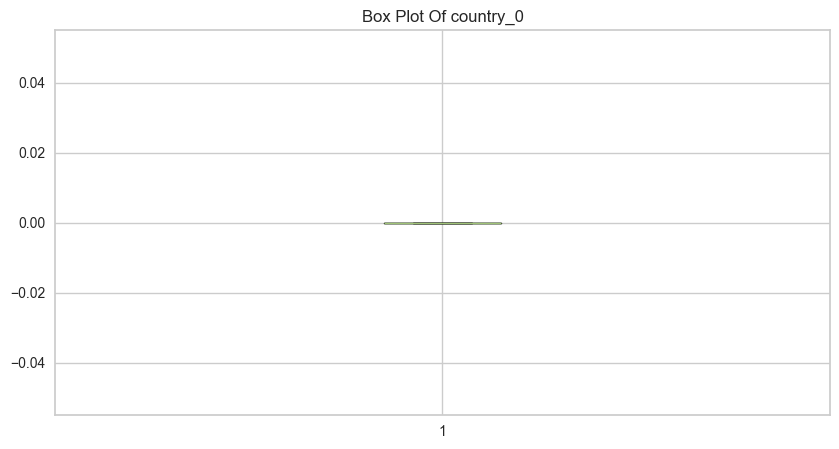

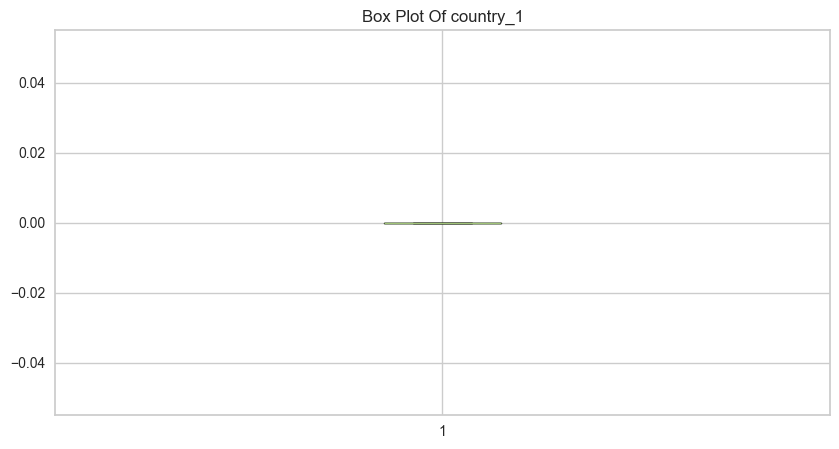

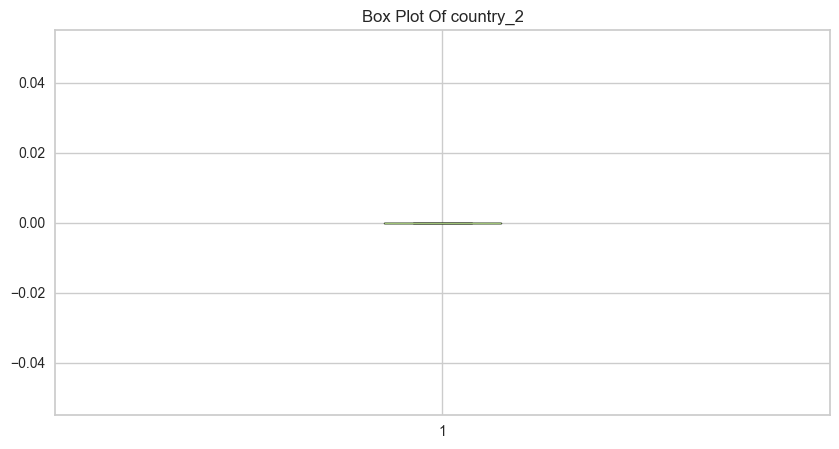

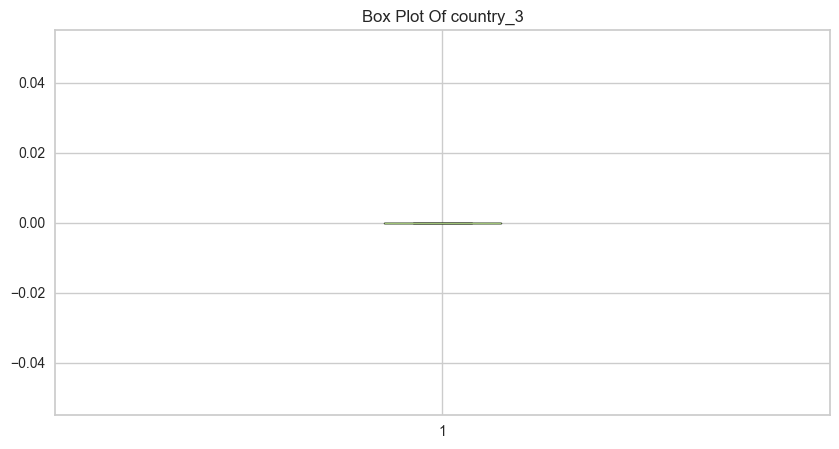

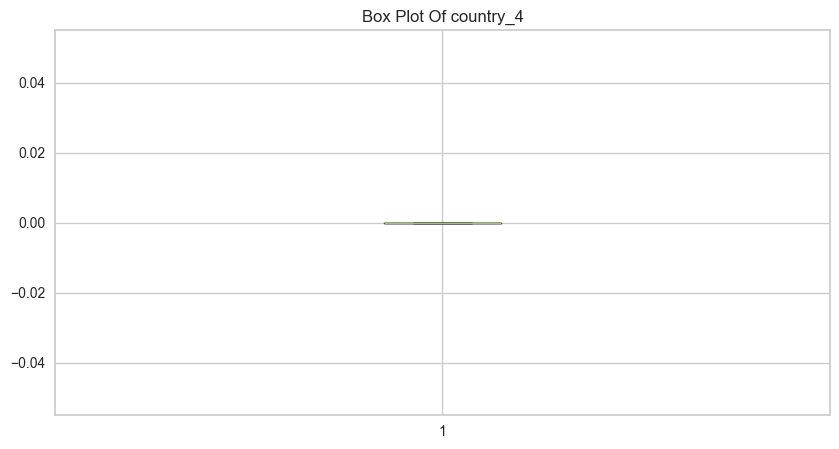

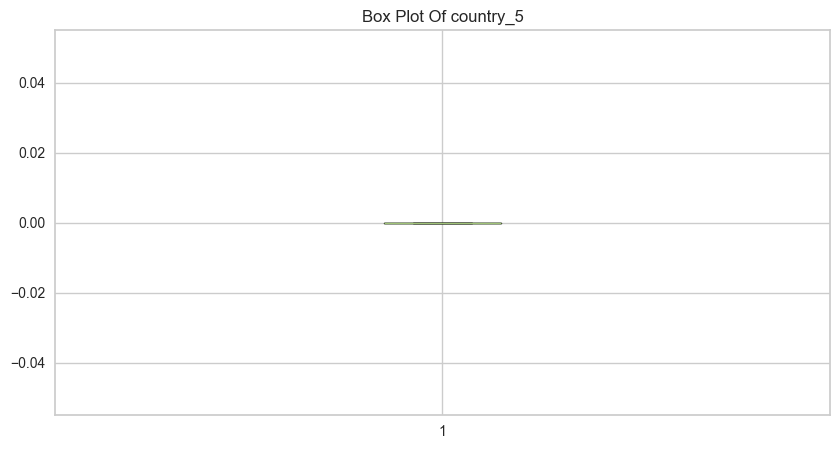

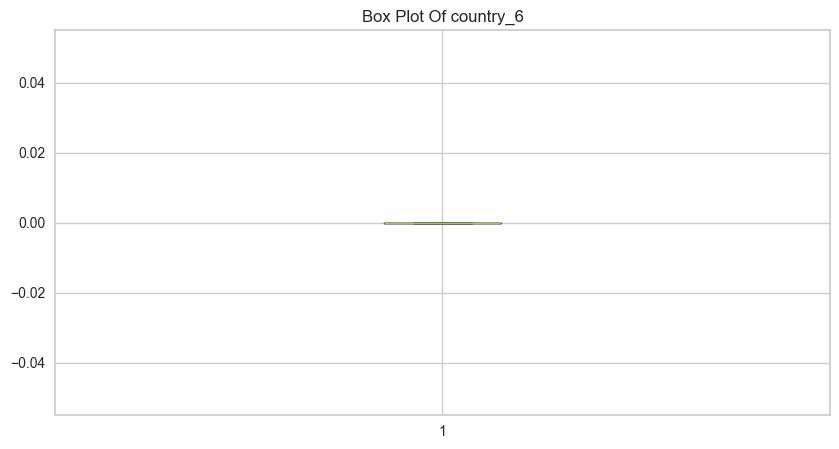

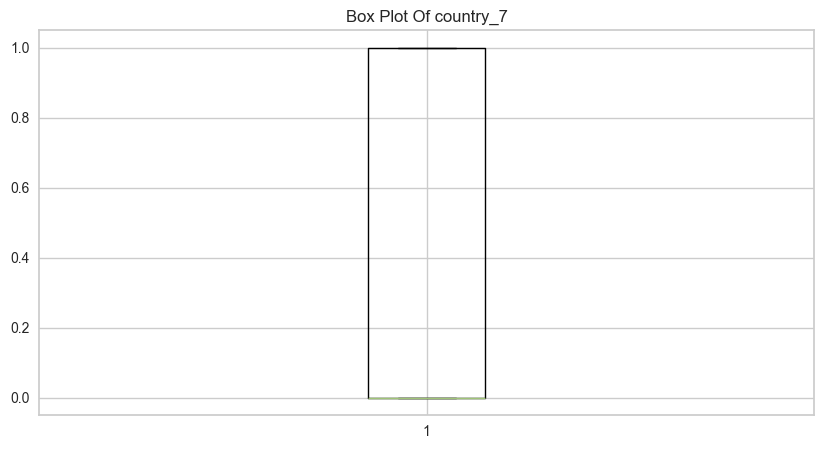

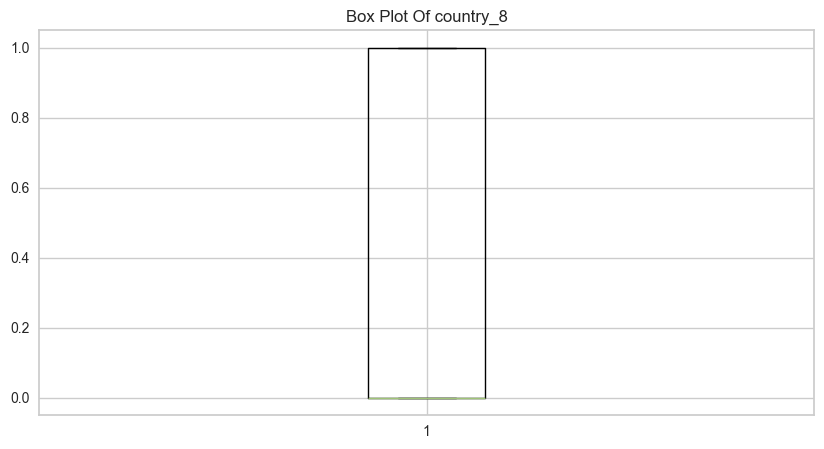

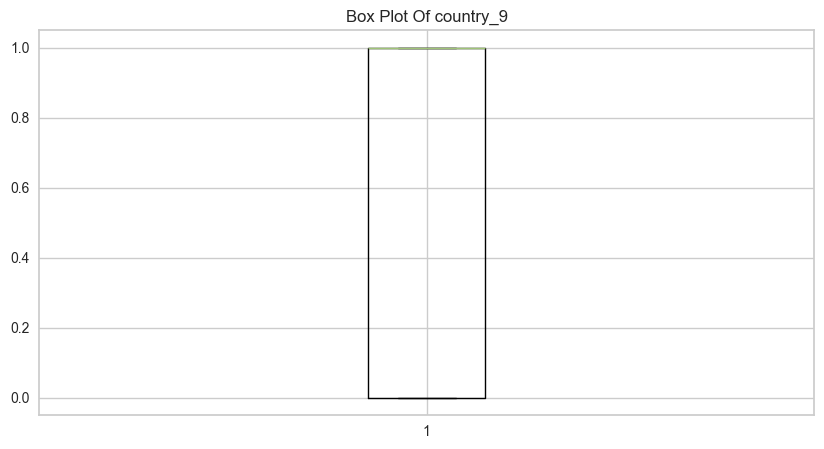

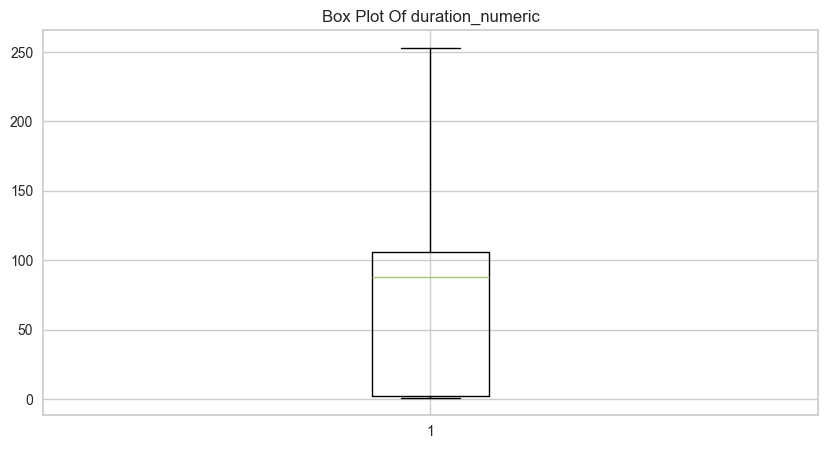

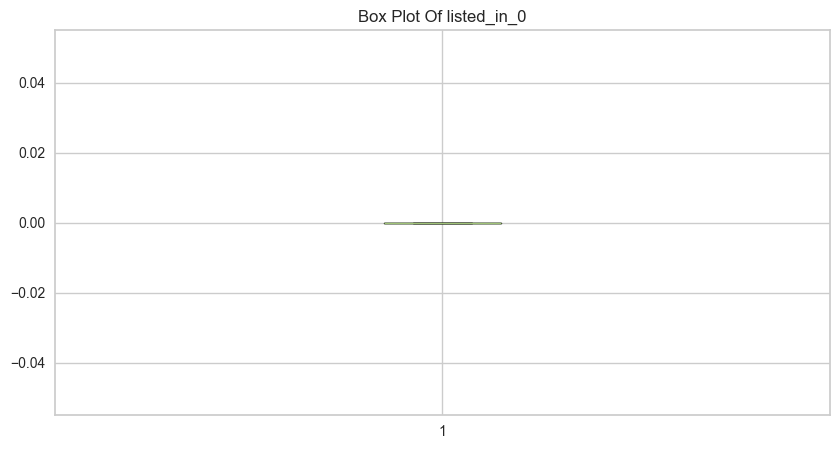

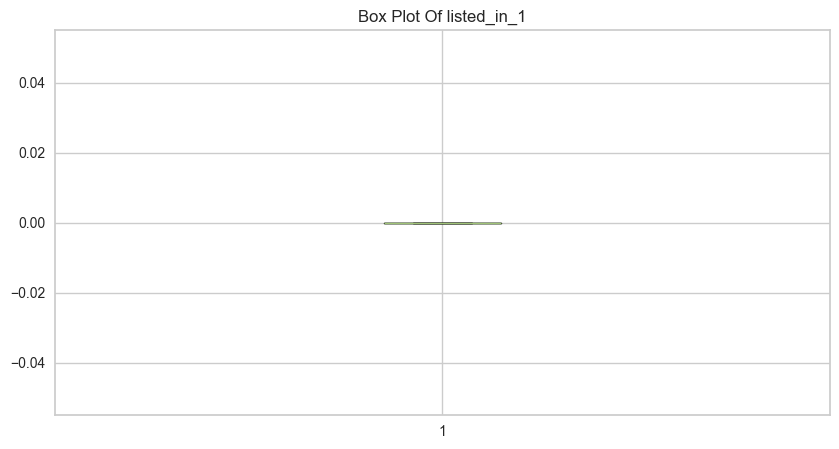

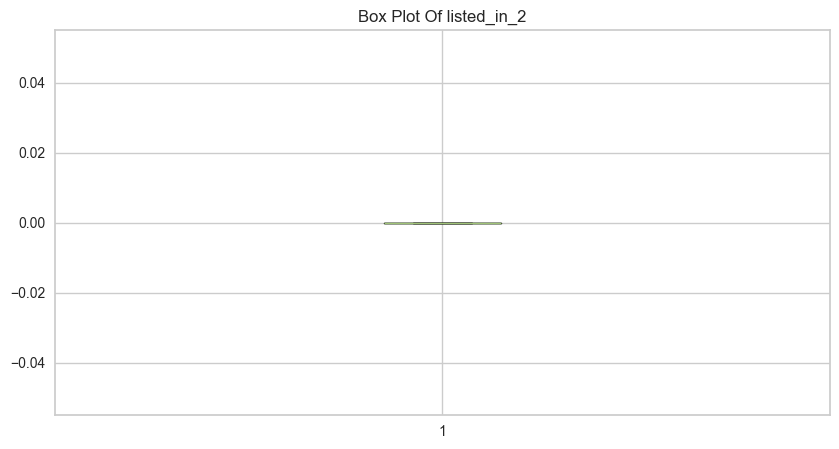

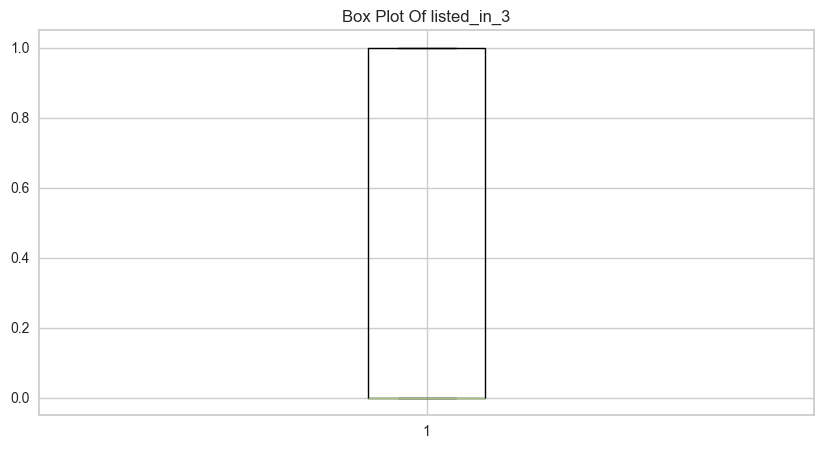

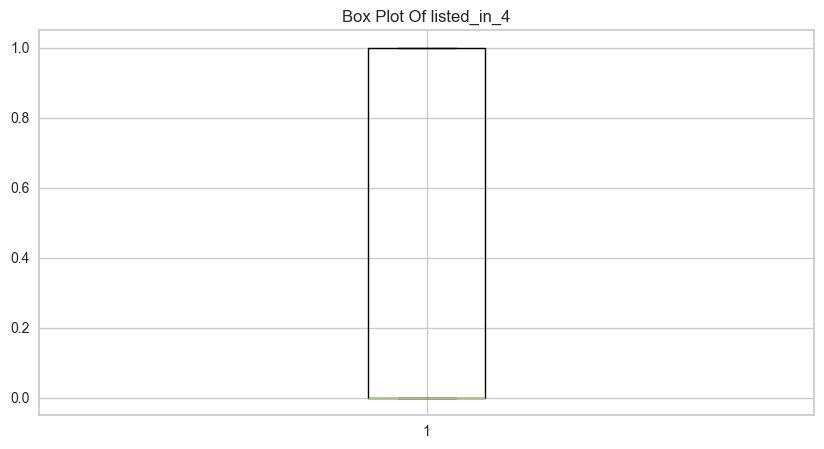

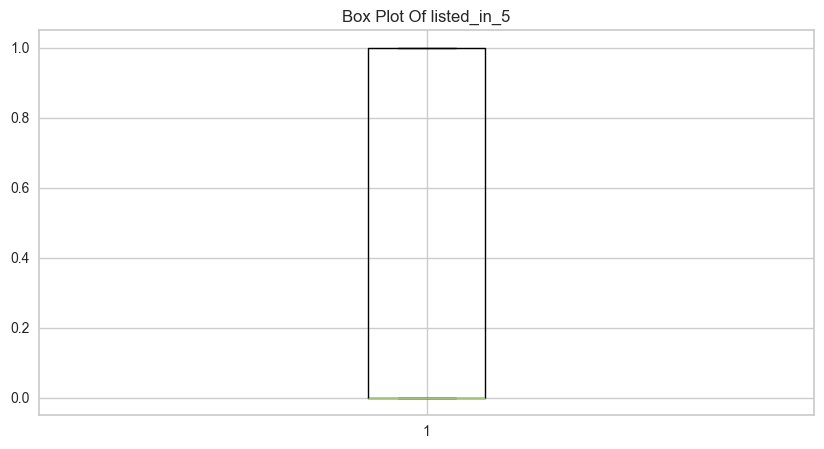

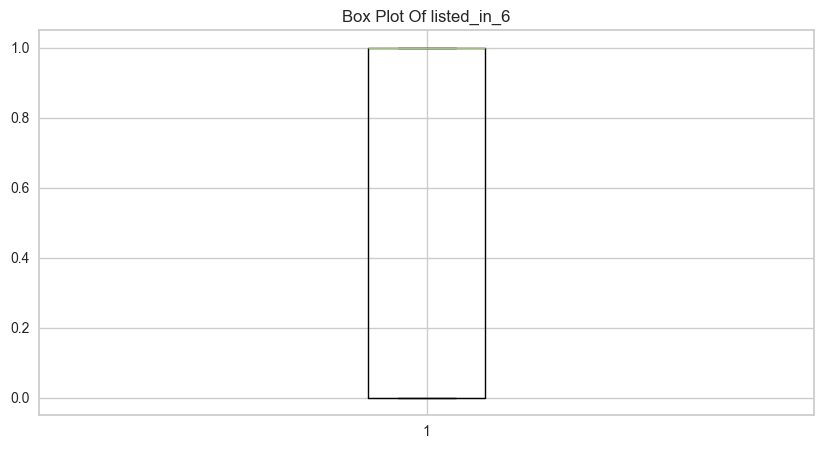

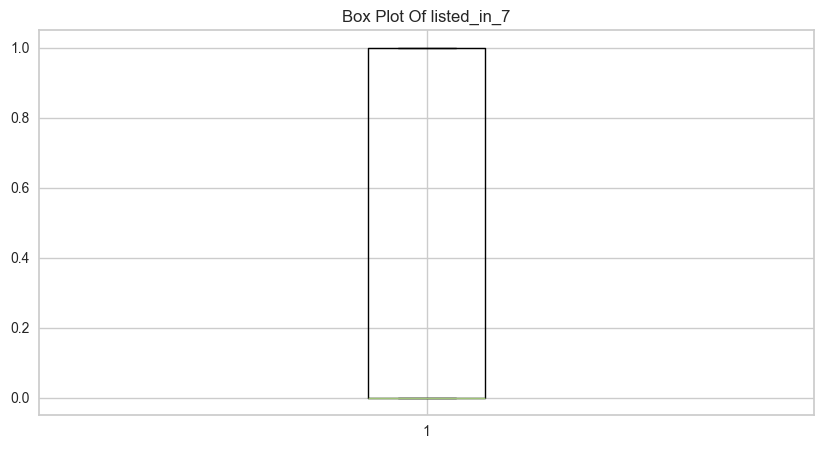

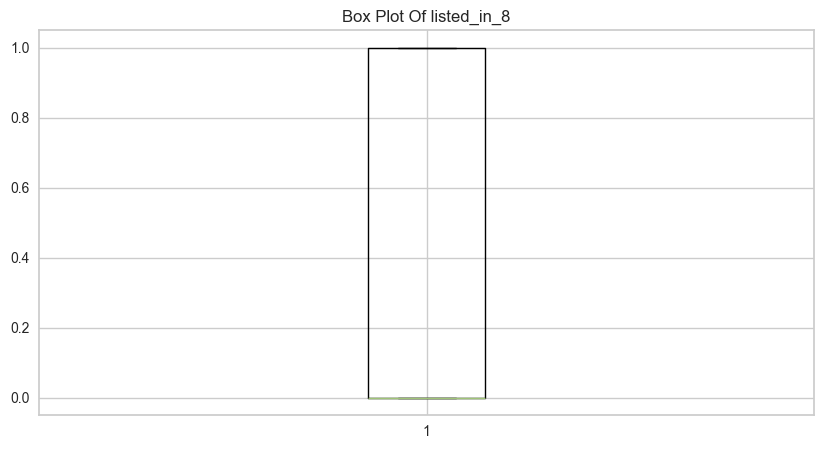

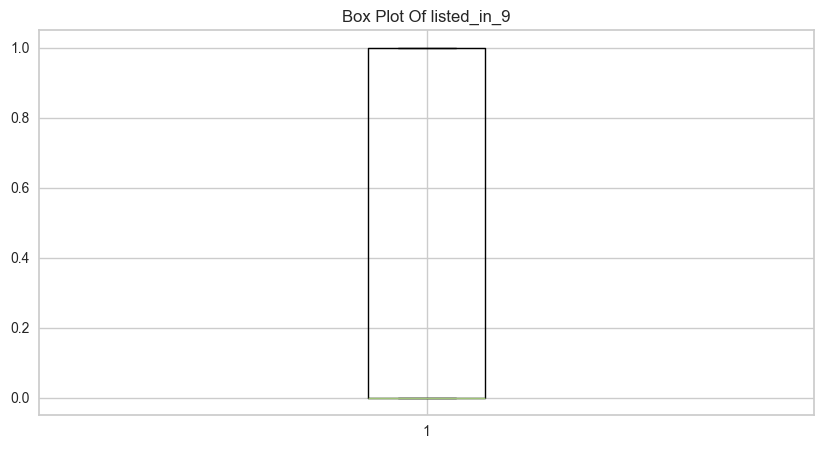

In [30]:
# Pilih hanya kolom dengan tipe data numerik
numeric_columns = data_filter.select_dtypes(include=['number']).columns

# Plot boxplot hanya untuk kolom numerik
for feature in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.boxplot(x=data_filter[feature])
    plt.title(f"Box Plot Of {feature}")
    plt.show()

## Standarisasi data

In [31]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Copy data asli
data_scaled = data_filter.copy()

# Pilih hanya kolom numerik
numerical_cols = data_filter.select_dtypes(include=['number']).columns

# Standarisasi kolom numerik
data_scaled[numerical_cols] = scaler.fit_transform(data_filter[numerical_cols])

# Tampilkan hasil
data_scaled.describe()

,type,release_year,rating,country_0,country_1,country_2,country_3,country_4,country_5,country_6,...,listed_in_1,listed_in_2,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,date_added
count,8.790000e+03,8.790000e+03,8.790000e+03,8790.0,8790.0,8790.0,8790.0,8790.0,8790.0,8790.0,...,8790.0,8790.0,8.790000e+03,8.790000e+03,8.790000e+03,8.790000e+03,8.790000e+03,8.790000e+03,8.790000e+03,8790
mean,1.293366e-17,1.821705e-14,5.496804e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.281240e-16,3.880097e-17,-6.466828e-17,7.153929e-17,2.020884e-18,-1.479287e-16,-1.002358e-16,2019-05-17 21:44:01.638225408
min,-6.594451e-01,-3.403627e+00,-2.099769e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-7.196336e-01,-8.508040e-01,-9.548302e-01,-1.031908e+00,-9.381972e-01,-8.879205e-01,-9.050539e-01,2008-01-01 00:00:00
25%,-6.594451e-01,-3.760306e-01,-4.531974e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-7.196336e-01,-8.508040e-01,-9.548302e-01,-1.031908e+00,-9.381972e-01,-8.879205e-01,-9.050539e-01,2018-04-06 00:00:00
50%,-6.594451e-01,1.744414e-01,-4.531974e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-7.196336e-01,-8.508040e-01,-9.548302e-01,9.690785e-01,-9.381972e-01,-8.879205e-01,-9.050539e-01,2019-07-03 00:00:00
75%,1.516427e+00,7.249134e-01,6.445169e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.389596e+00,1.175359e+00,1.047307e+00,9.690785e-01,1.065874e+00,1.126227e+00,1.104907e+00,2020-08-19 18:00:00
max,1.516427e+00,1.275385e+00,2.291088e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.389596e+00,1.175359e+00,1.047307e+00,9.690785e-01,1.065874e+00,1.126227e+00,1.104907e+00,2021-09-25 00:00:00
std,1.000057e+00,1.000057e+00,1.000057e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,1.000057e+00,NaN


# **6. Pembangunan Model Clustering**

## **a. Feature Selection (Opsional)**

In [ ]:
from sklearn.decomposition import PCA

# ambil data numerik
df_numerik = data_scaled.select_dtypes(include=['number']).columns

# Membuat objek PCA
pca = PCA(n_components=9)  

# Terapkan PCA hanya pada data numerik
X_pca = pca.fit_transform(data_filter[df_numerik])

# Menampilkan total variansi yang dijelaskan
total_variance = sum(pca.explained_variance_ratio_)
print(f"Total Variansi yang Dijelaskan oleh Komponen Utama: {total_variance}")

Total Variansi yang Dijelaskan oleh Komponen Utama: 0.999724682439648


## **b. Pembangunan Model Clustering**

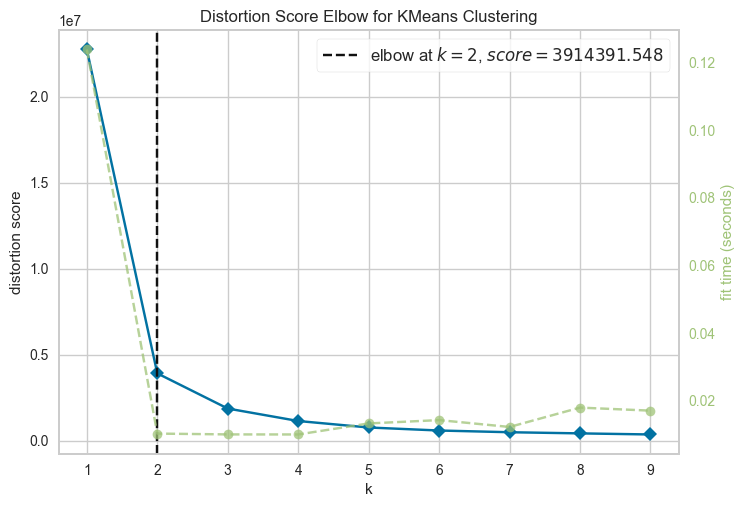

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_pca)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans

# Terapkan K-Means clustering
kmeans = KMeans(
    n_clusters=2, 
    init='k-means++', 
    n_init=20,  
    max_iter=600, 
    random_state=43
)

clusters_kmens = kmeans.fit_predict(X_pca)

# Menambahkan hasil clustering ke dataframe
data_scaled['cluster'] = clusters_kmens

# Menampilkan hasil
print(data_scaled[['title', 'cluster']].head())

                   title  cluster
0   Dick Johnson Is Dead        1
1          Blood & Water        0
2              Ganglands        0
3  Jailbirds New Orleans        0
4           Kota Factory        0


## **c. Evaluasi Model Clustering**

In [ ]:
# Evaluasi model dengan silhoutte scorr
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, clusters_kmens)
print(f"Silhouette Score Kmens: {silhouette_avg:.4f}")

Silhouette Score Kmens: 0.7600


## **d. Visualisasi Hasil Clustering**

### Visualisasi distribusi data clustering

In [1375]:
# melihat data hasil clustering
for i in range(2):
    print(f"cluster {i}")
    print(data_scaled[data_scaled['cluster'] == i][['title', 'rating']].sample(20))
    print("\n")

cluster 0
                                             title    rating
5157                                         Argon -0.453197
1794                            The Devil Punisher  0.644517
2551                                    Dead to Me -0.453197
110              Money Heist: From Tokyo to Berlin -0.453197
2971                                      Diablero -0.453197
4240             Sam Kinison: The Scream Continues -0.453197
4368      Mystery Science Theater 3000: The Return  0.644517
4320                                     Neo Yokio -0.453197
4122                             One Day at a Time  1.193374
8094                                     Stone Age  2.291088
74       The World's Most Amazing Vacation Rentals  1.193374
3356                                   Nowhere Man -0.453197
4055                                  Larva Island  2.291088
2575                                    WWII in HD  0.644517
3271                                         K-On!  1.193374
4908          

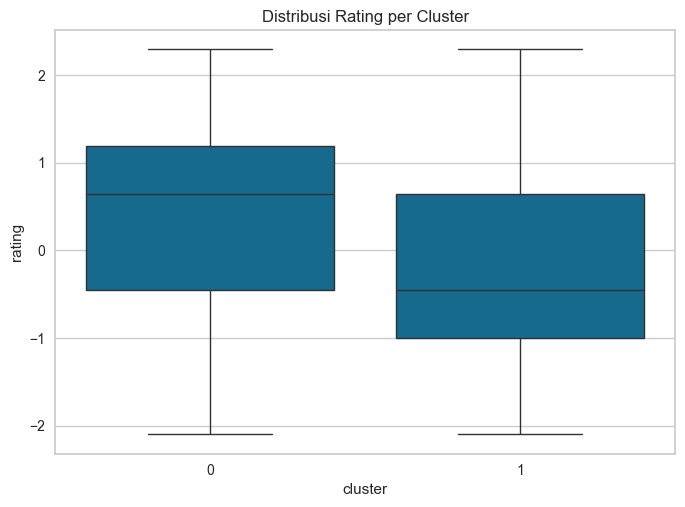

In [ ]:
# Distribusi Rating per Cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='cluster', y='rating', data=data_scaled)
plt.title('Distribusi Rating per Cluster')
plt.show()

### Visualisasi Dengan PCA

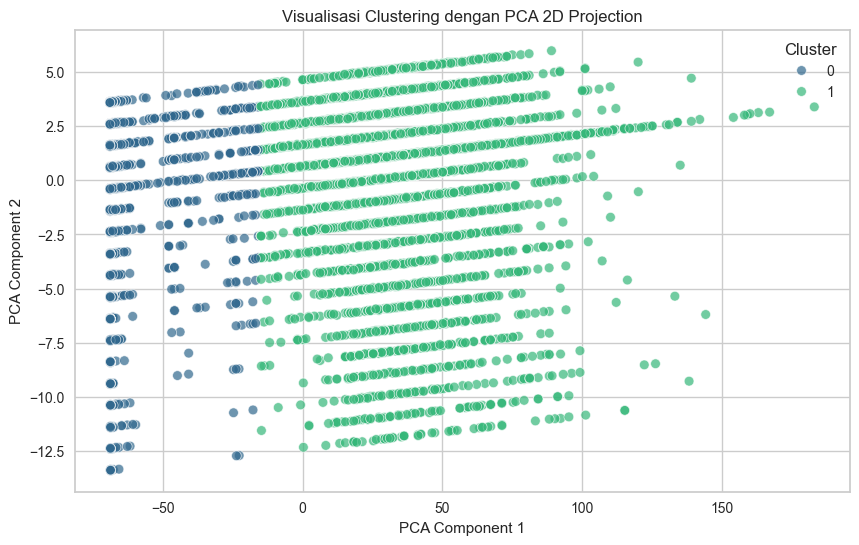

In [1377]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat scatter plot menggunakan hasil PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmens, palette='viridis', alpha=0.7)

# Tambahkan title dan label
plt.title('Visualisasi Clustering dengan PCA 2D Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

### Visualisasi Dengan T-SNE

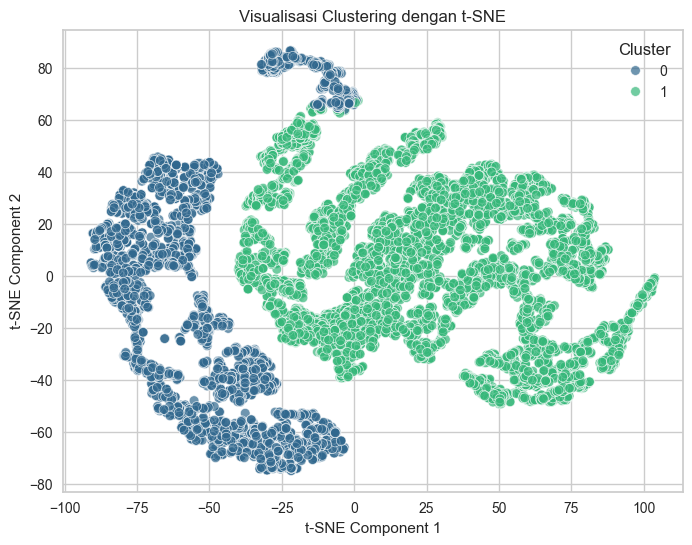

In [1379]:
from sklearn.manifold import TSNE

# Reduksi dimensi ke 2D menggunakan t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)  # Gunakan data PCA atau data asli

# Plot hasil t-SNE
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters_kmens, palette='viridis', alpha=0.7)
plt.title("Visualisasi Clustering dengan t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()


### Visualisasi Dengan 3D PCA

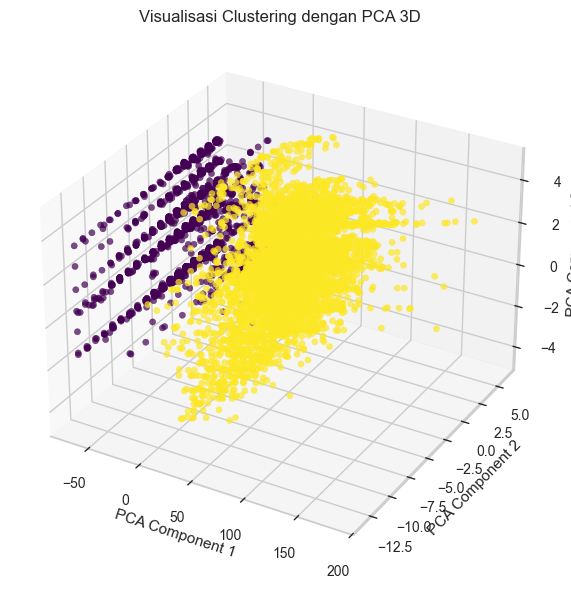

In [1378]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Reduksi dimensi ke 3D menggunakan PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_pca)

# Plot hasil PCA 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters_kmens, cmap='viridis', alpha=0.7)

ax.set_title("Visualisasi Clustering dengan PCA 3D")
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")

plt.show()

# **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse Data Jika Melakukan Encoding/Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [40]:
# inverse data standarisasi
data_unscaled = data_scaled.copy()
data_unscaled[numerical_cols] = scaler.inverse_transform(data_scaled[numerical_cols])
data_unscaled.head()

,type,release_year,rating,country_0,country_1,country_2,country_3,country_4,country_5,country_6,...,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,title,date_added,cluster
0,0.0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dick Johnson Is Dead,2021-09-25,1
1,1.0,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Blood & Water,2021-09-24,0
2,1.0,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ganglands,2021-09-24,0
3,1.0,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Jailbirds New Orleans,2021-09-24,0
4,1.0,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Kota Factory,2021-09-24,0


In [41]:
# Inverse encoding dari 0 dan 1 ke 'Movie' dan 'TV Show'
type_decoded = data_unscaled.copy()
type_decoded['type'] = type_decoded['type'].map({0: 'Movie', 1: 'TV Show'})

type_decoded.head()

,type,release_year,rating,country_0,country_1,country_2,country_3,country_4,country_5,country_6,...,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,title,date_added,cluster
0,Movie,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dick Johnson Is Dead,2021-09-25,1
1,TV Show,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Blood & Water,2021-09-24,0
2,TV Show,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ganglands,2021-09-24,0
3,TV Show,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Jailbirds New Orleans,2021-09-24,0
4,TV Show,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Kota Factory,2021-09-24,0


In [ ]:
# Inverse transform dari hasil encoding kembali ke kolom aslinya
decoded_country = encoder.inverse_transform(encoding)

# Buang semua kolom hasil encoding binary 'country'
cols_to_drop = [col for col in type_decoded.columns if col.startswith('country_')]
df_temp = type_decoded.drop(columns=['country'] + cols_to_drop, errors='ignore')

# Sisipkan kembali kolom 'country' hasil inverse
df_temp.insert(2, 'country', decoded_country['country'])

# Salin ke data_final untuk hasil akhir
data_final = df_temp.copy()

# Cek hasil
data_final.head()

,type,release_year,country,rating,duration_numeric,listed_in_0,listed_in_1,listed_in_2,listed_in_3,listed_in_4,listed_in_5,listed_in_6,listed_in_7,listed_in_8,listed_in_9,title,date_added,cluster
0,Movie,2020.0,United States,2.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Dick Johnson Is Dead,2021-09-25,1
1,TV Show,2021.0,South Africa,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Blood & Water,2021-09-24,0
2,TV Show,2021.0,Unknown,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Ganglands,2021-09-24,0
3,TV Show,2021.0,Unknown,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Jailbirds New Orleans,2021-09-24,0
4,TV Show,2021.0,India,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Kota Factory,2021-09-24,0


In [ ]:
# Inverse transform kolom listed_in
decoded_genre = encoder.inverse_transform(encoded_genre)

# Drop kolom asli dan hasil encoding binary dari 'listed_in'
drop_listed = [col for col in data_final.columns if col.startswith('listed_in_')]
df_temp = data_final.drop(columns=['listed_in'] + drop_listed, errors='ignore')

# Sisipkan kembali kolom hasil inverse transform 
df_temp.insert(6, 'listed_in', decoded_genre['listed_in'])

# Update hasil ke data_final
data_final = df_temp.copy()

# Cek hasil akhir
data_final.head()

,type,release_year,country,rating,duration_numeric,title,listed_in,date_added,cluster
0,Movie,2020.0,United States,2.0,90.0,Dick Johnson Is Dead,Documentaries,2021-09-25,1
1,TV Show,2021.0,South Africa,4.0,2.0,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24,0
2,TV Show,2021.0,Unknown,4.0,1.0,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,0
3,TV Show,2021.0,Unknown,4.0,1.0,Jailbirds New Orleans,"Docuseries, Reality TV",2021-09-24,0
4,TV Show,2021.0,India,4.0,2.0,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24,0


In [48]:
# Inverse kolom rating
inverse_rating_map = {v: k for k, v in rating_map.items()}

# Gunakan map untuk mengubah angka kembali ke kategori rating
data_final['rating'] = data_final['rating'].map(inverse_rating_map)

# Cek hasilnya
data_final.head()

,type,release_year,country,rating,duration_numeric,title,listed_in,date_added,cluster
0,Movie,2020.0,United States,PG-13,90.0,Dick Johnson Is Dead,Documentaries,2021-09-25,1
1,TV Show,2021.0,South Africa,TV-MA,2.0,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24,0
2,TV Show,2021.0,Unknown,TV-MA,1.0,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,0
3,TV Show,2021.0,Unknown,TV-MA,1.0,Jailbirds New Orleans,"Docuseries, Reality TV",2021-09-24,0
4,TV Show,2021.0,India,TV-MA,2.0,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24,0


In [ ]:
# Inverse duration kolom
# Buat kolom 'duration' dari kolom 'duration_numeric'
duration_col = data_final['duration_numeric'].apply(
    lambda x: f"{int(x)} min" if x > 20 else f"{int(x)} Season" if x == 1 else f"{int(x)} Seasons"
)

# Hapus kolom 'duration_numeric'
data_final = data_final.drop(columns=['duration_numeric'])

# Sisipkan kolom 'duration' 
data_final.insert(4, 'duration', duration_col)

# Cek hasilnya
data_final.head()

,type,release_year,country,rating,duration,title,listed_in,date_added,cluster
0,Movie,2020.0,United States,PG-13,90 min,Dick Johnson Is Dead,Documentaries,2021-09-25,1
1,TV Show,2021.0,South Africa,TV-MA,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries",2021-09-24,0
2,TV Show,2021.0,Unknown,TV-MA,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",2021-09-24,0
3,TV Show,2021.0,Unknown,TV-MA,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV",2021-09-24,0
4,TV Show,2021.0,India,TV-MA,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",2021-09-24,0


In [50]:
# Inverse date kolom
data_final['date_added'] = data_final['date_added'].dt.strftime('%B %d, %Y')
# Cek hasilnya
data_final.head()

,type,release_year,country,rating,duration,title,listed_in,date_added,cluster
0,Movie,2020.0,United States,PG-13,90 min,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1
1,TV Show,2021.0,South Africa,TV-MA,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0
2,TV Show,2021.0,Unknown,TV-MA,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0
3,TV Show,2021.0,Unknown,TV-MA,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0
4,TV Show,2021.0,India,TV-MA,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0


### Agregasi pada fitur yang sudah diinversi

In [51]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          8790 non-null   object 
 1   release_year  8790 non-null   float64
 2   country       8790 non-null   object 
 3   rating        8790 non-null   object 
 4   duration      8790 non-null   object 
 5   title         8790 non-null   object 
 6   listed_in     8790 non-null   object 
 7   date_added    8790 non-null   object 
 8   cluster       8790 non-null   int32  
dtypes: float64(1), int32(1), object(7)
memory usage: 652.4+ KB


In [66]:
# Pisahkan kolom numerik
df_numerik = data_final.select_dtypes(include=['int64', 'float64']).copy()
df_numerik['cluster'] = data_final['cluster']

# Hitung mean, min, dan max untuk fitur numerik
agg_numerik = df_numerik.groupby('cluster').agg(['min', 'max', 'mean'])

# Pisahkan kolom kategorikal
df_kategorikal = data_final.select_dtypes(include='object').copy()
df_kategorikal['cluster'] = data_final['cluster']

# Hitung modus untuk fitur kategorikal
agg_kategorikal = df_kategorikal.groupby('cluster').agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

In [ ]:
# Tampilkan agregasi numerik
print("Agregasi Numerik:")
print(agg_numerik)

Agregasi Numerik:
        release_year                     
                 min     max         mean
cluster                                  
0             2004.0  2021.0  2017.272367
1             2004.0  2021.0  2015.889776


In [69]:
# Tampilkan agregasi katgorikal
print("Agregasi Kategorikal:")
print(agg_kategorikal)

Agregasi Kategorikal:
            type        country rating  duration     title  \
cluster                                                      
0        TV Show  United States  TV-MA  1 Season  #blackAF   
1          Movie  United States  TV-MA    90 min    #Alive   

                            listed_in        date_added  
cluster                                                  
0                            Kids' TV  January 01, 2016  
1        Dramas, International Movies  January 01, 2020  


## Analisa Hasil Agregasi

## Cluster 0

- Klaster 0 didapatkan karena variabel release_year memiliki nilai rata-rata 2017.27, dengan batas minimum 2004 dan batas maksimum 2021, menunjukkan bahwa konten dalam klaster ini berasal dari periode yang cukup baru, terutama tahun 2010 ke atas.

- Secara kategorikal, klaster ini didominasi oleh konten bertipe TV Show, berasal dari United States, dengan rating TV-MA. Durasi yang umum adalah 1 Season, dengan genre yang paling sering muncul adalah Kids' TV. Tanggal penambahan konten yang paling umum adalah January 01, 2016, yang menunjukkan bahwa klaster ini kemungkinan berisi tayangan anak-anak atau remaja dengan format serial dan rating dewasa ringan.

## Cluster 1

- Klaster 1 didapatkan karena variabel release_year memiliki nilai rata-rata 2015.89, dengan batas minimum 2004 dan batas maksimum 2021, menunjukkan bahwa konten dalam klaster ini juga termasuk konten modern, tapi sedikit lebih lama dibanding klaster 0.

- Secara kategorikal, klaster ini didominasi oleh konten bertipe Movie, juga berasal dari United States, dengan rating TV-MA. Durasi umum adalah 90 menit, dengan genre yang paling sering muncul yaitu Dramas, International Movies. Tanggal penambahan yang paling umum adalah January 01, 2020, menunjukkan bahwa klaster ini berisi film-film drama internasional berdurasi standar dengan rating dewasa.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
Rata-rata Rating: Cenderung menengah ke tinggi (sekitar 0.6 hingga 2.2)

Contoh Judul:

- Q-Force

- Spy Kids: Mission Critical

- Ouran High School Host Club

- Levius

- LeapFrog: Phonics Farm

Analisis: Cluster ini berisi film-film dengan tema ringan, keluarga, animasi, atau komedi romantis. Banyak dari filmnya cocok untuk segmen remaja atau anak-anak, dan terlihat memiliki nilai rating yang relatif baik. Film dalam cluster ini cenderung bersifat edukatif, menghibur, dan positif, sehingga dapat ditargetkan untuk penonton umum atau keluarga.

## Cluster 1:
Rata-rata Rating: Didominasi oleh rating rendah hingga sedang (sekitar -1.5 hingga 0.6)

Contoh Judul:
- The Incredible Story of the Giant Pear
- Cutie and the Boxer
- USS Indianapolis: Men of Courage
- Chasing Coral
- Dil Chahta Hai

Analisis: Cluster ini didominasi oleh film dengan rating rendah hingga sedang, seringkali mengangkat tema yang lebih serius, kontroversial, atau emosional, seperti dokumenter kriminal, drama sosial, dan thriller. Cocok untuk penonton dewasa yang tertarik dengan cerita yang lebih dalam, kompleks, atau bernuansa gelap.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1290]:
data_final.to_csv('netflix.csv')
new_data = pd.read_csv('netflix.csv')
new_data.head()

,Unnamed: 0,type,release_year,country,rating,duration,title,listed_in,date_added,cluster
0,0,Movie,2020.0,United States,PG-13,90 min,Dick Johnson Is Dead,Documentaries,"September 25, 2021",1
1,1,TV Show,2021.0,South Africa,TV-MA,2 Seasons,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","September 24, 2021",0
2,2,TV Show,2021.0,Unknown,TV-MA,1 Season,Ganglands,"Crime TV Shows, International TV Shows, TV Act...","September 24, 2021",0
3,3,TV Show,2021.0,Unknown,TV-MA,1 Season,Jailbirds New Orleans,"Docuseries, Reality TV","September 24, 2021",0
4,4,TV Show,2021.0,India,TV-MA,2 Seasons,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...","September 24, 2021",0
